In [2]:
import numpy as np
import pandas as pd
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from pyscenic.binarization import binarize
import pickle
import matplotlib as mpl

# Inital setting for plot size
from matplotlib import rcParams
FIGSIZE=(5,5)
rcParams['figure.figsize']=FIGSIZE

In [3]:
with open('../data/adata_epi_last.pickle', 'rb') as f1:
     adata_epi = pickle.load(f1)

In [3]:
cell_annot = adata_epi.obs

# Raw data

In [9]:
df = pd.read_csv("../data/SCENIC/pyscenic_output_raw.csv", index_col = 0)
df

,Ahr(+),Alx3(+),Atf2(+),Atf3(+),Atf4(+),Atf5(+),Atf7(+),Bach1(+),Bach2(+),Barx2(+),...,Zbtb20(+),Zbtb7a(+),Zbtb7c(+),Zfp148(+),Zfp407(+),Zfp704(+),Zfp740(+),Zfx(+),Zxdb(+),Zxdc(+)
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGCTCAACCACAT-1_1,0.285900,0.190199,0.294374,0.370367,0.450814,0.140623,0.282473,0.385599,0.267066,0.149304,...,0.298503,0.304384,0.241501,0.348965,0.289316,0.305428,0.213994,0.264229,0.325689,0.136184
AAAGTGAGTGAATAAC-1_1,0.387456,0.058876,0.421843,0.562172,0.706417,0.180412,0.451449,0.650551,0.411699,0.272896,...,0.454776,0.457114,0.366802,0.552861,0.417034,0.473313,0.318407,0.454142,0.362978,0.000000
AACAAAGCATAGATGA-1_1,0.342312,0.131799,0.308654,0.471349,0.556713,0.100246,0.366242,0.492380,0.323025,0.362271,...,0.369672,0.356951,0.283675,0.418302,0.318832,0.402299,0.236206,0.350548,0.272917,0.070957
AACCAACGTGGGAGAG-1_1,0.360058,0.136112,0.390585,0.445341,0.570960,0.103394,0.373973,0.531240,0.317642,0.121793,...,0.370317,0.411669,0.316797,0.443404,0.341640,0.381534,0.240881,0.346456,0.361915,0.075317
AACTTCTTCCAGCAAT-1_1,0.449314,0.029757,0.491215,0.542799,0.697031,0.261829,0.487410,0.658473,0.455701,0.250437,...,0.489601,0.443285,0.395011,0.597823,0.477100,0.505103,0.368645,0.512613,0.312098,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45p_GM4D_GTAGATCAGCTGAAAT-1,0.388434,0.139845,0.378500,0.507731,0.508785,0.105760,0.474984,0.413700,0.465816,0.245112,...,0.459461,0.402156,0.347883,0.424776,0.426456,0.467958,0.270974,0.387929,0.264693,0.080655
45p_GM4D_TAGGTACAGCAGGCTA-1,0.429333,0.155142,0.368152,0.577847,0.482487,0.344341,0.503697,0.412214,0.504427,0.470528,...,0.498103,0.459830,0.371385,0.449356,0.457605,0.525559,0.277769,0.416051,0.265655,0.098663
45p_GM4D_TCTACATGTCTATGAC-1,0.432867,0.183705,0.307451,0.495937,0.426388,0.136145,0.391584,0.310305,0.399301,0.326588,...,0.394117,0.352408,0.280924,0.340934,0.355206,0.425971,0.296201,0.334277,0.335845,0.129732


In [10]:
rss_cellType = regulon_specificity_scores(df, cell_annot['Stade'] )
rss_cellType

,Ahr(+),Alx3(+),Atf2(+),Atf3(+),Atf4(+),Atf5(+),Atf7(+),Bach1(+),Bach2(+),Barx2(+),...,Zbtb20(+),Zbtb7a(+),Zbtb7c(+),Zfp148(+),Zfp407(+),Zfp704(+),Zfp740(+),Zfx(+),Zxdb(+),Zxdc(+)
Tumor,0.588306,0.560856,0.592512,0.565413,0.603133,0.594306,0.577913,0.617327,0.564419,0.534939,...,0.579093,0.600639,0.597498,0.597795,0.582972,0.570074,0.600230,0.591955,0.596817,0.505373
Healthy,0.377268,0.396599,0.371493,0.394762,0.368963,0.354297,0.378906,0.355801,0.387414,0.387606,...,0.379360,0.370354,0.365225,0.367426,0.374148,0.385851,0.370859,0.371694,0.376492,0.402806
Early_Stages_s1,0.229241,0.224015,0.228986,0.230221,0.226343,0.217465,0.230899,0.223893,0.232276,0.235365,...,0.230237,0.225983,0.226720,0.227619,0.230407,0.230832,0.226205,0.228802,0.224679,0.222389
Early_Stages_s2,0.286023,0.287212,0.282653,0.290922,0.274392,0.261537,0.290053,0.270258,0.295724,0.301572,...,0.289235,0.280101,0.280383,0.280563,0.287298,0.293358,0.281101,0.283626,0.280592,0.289085


<Axes: >

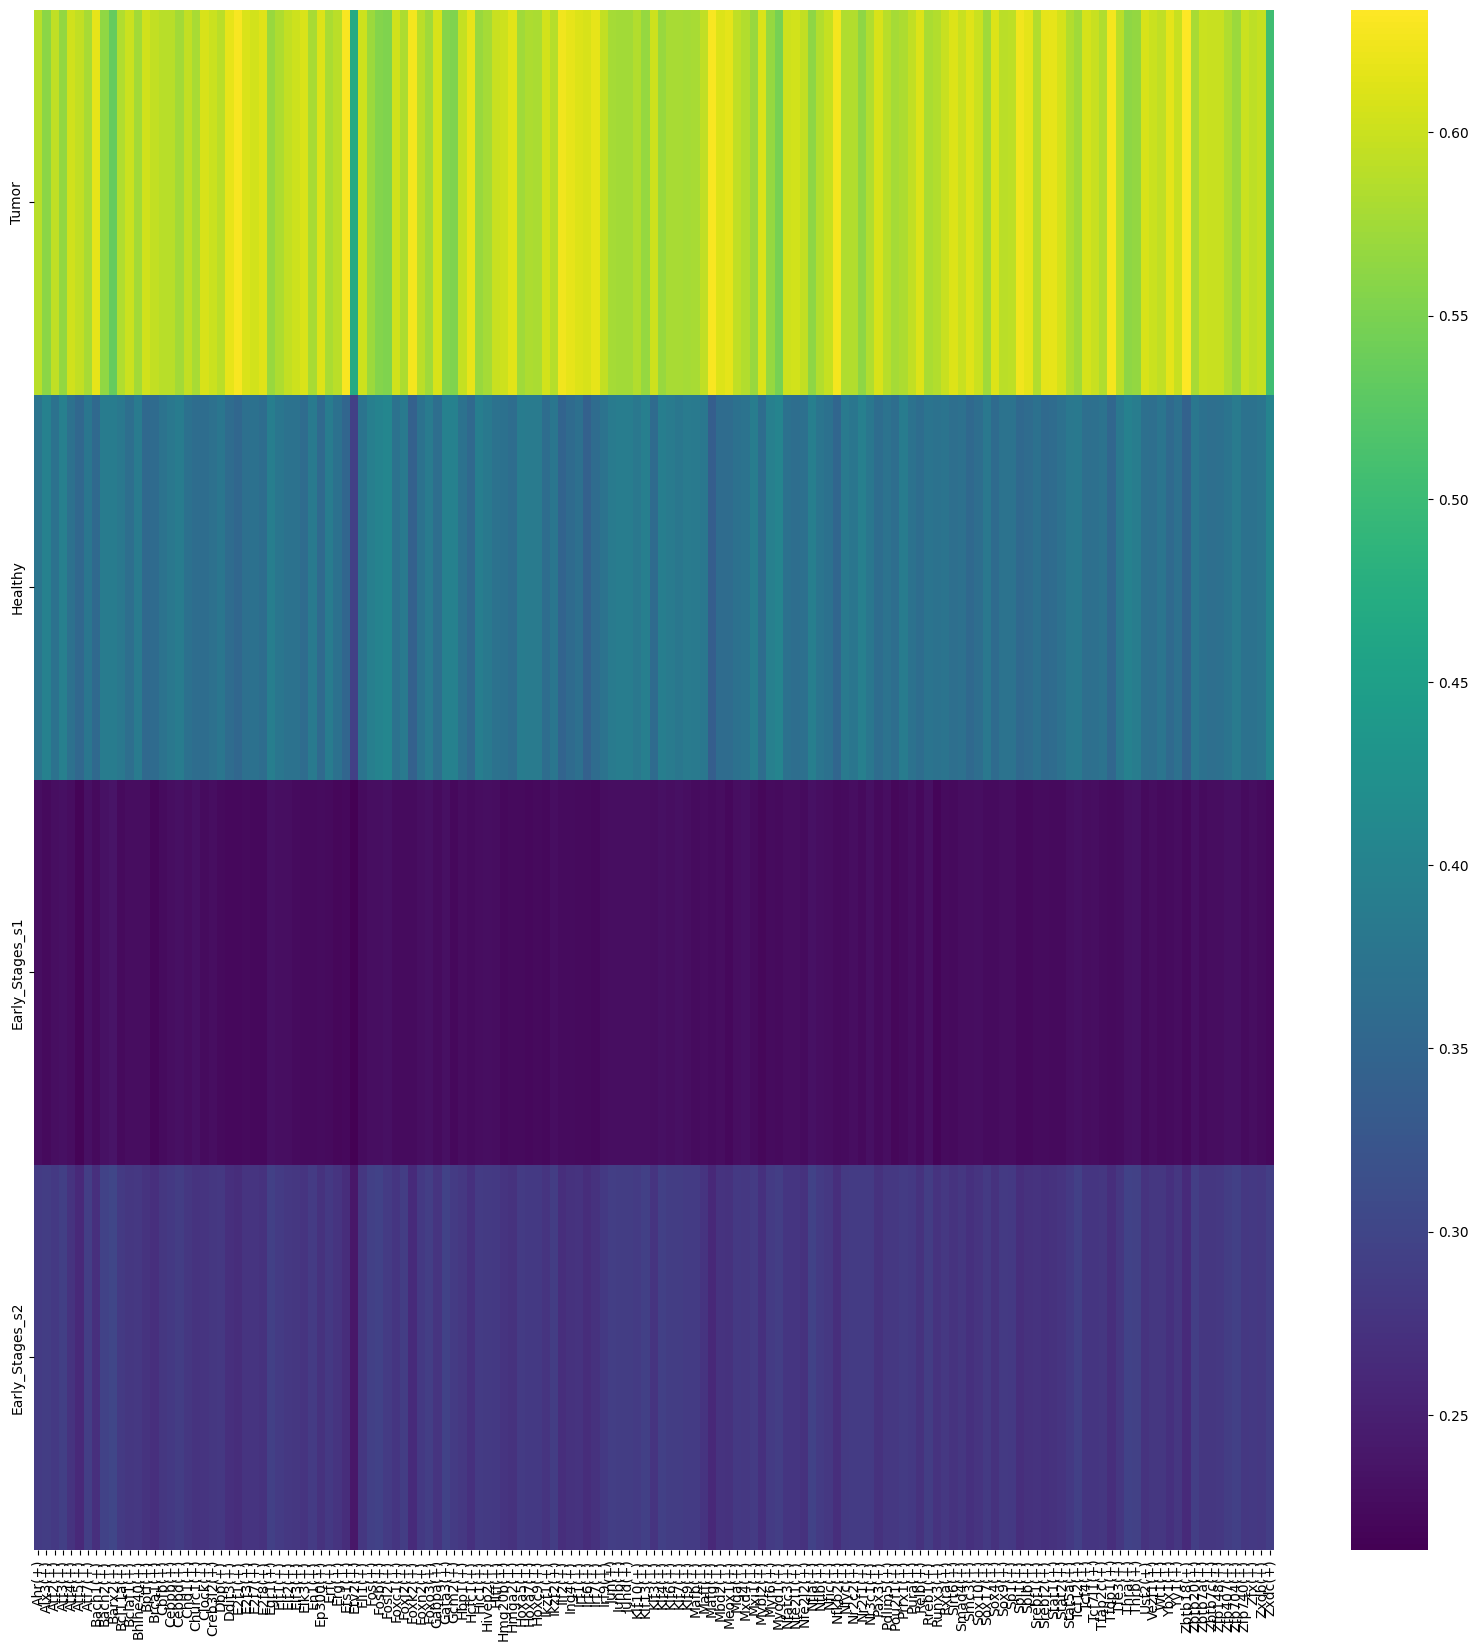

In [11]:
sns.heatmap(rss_cellType, cmap = 'viridis',xticklabels=1, yticklabels=1 )

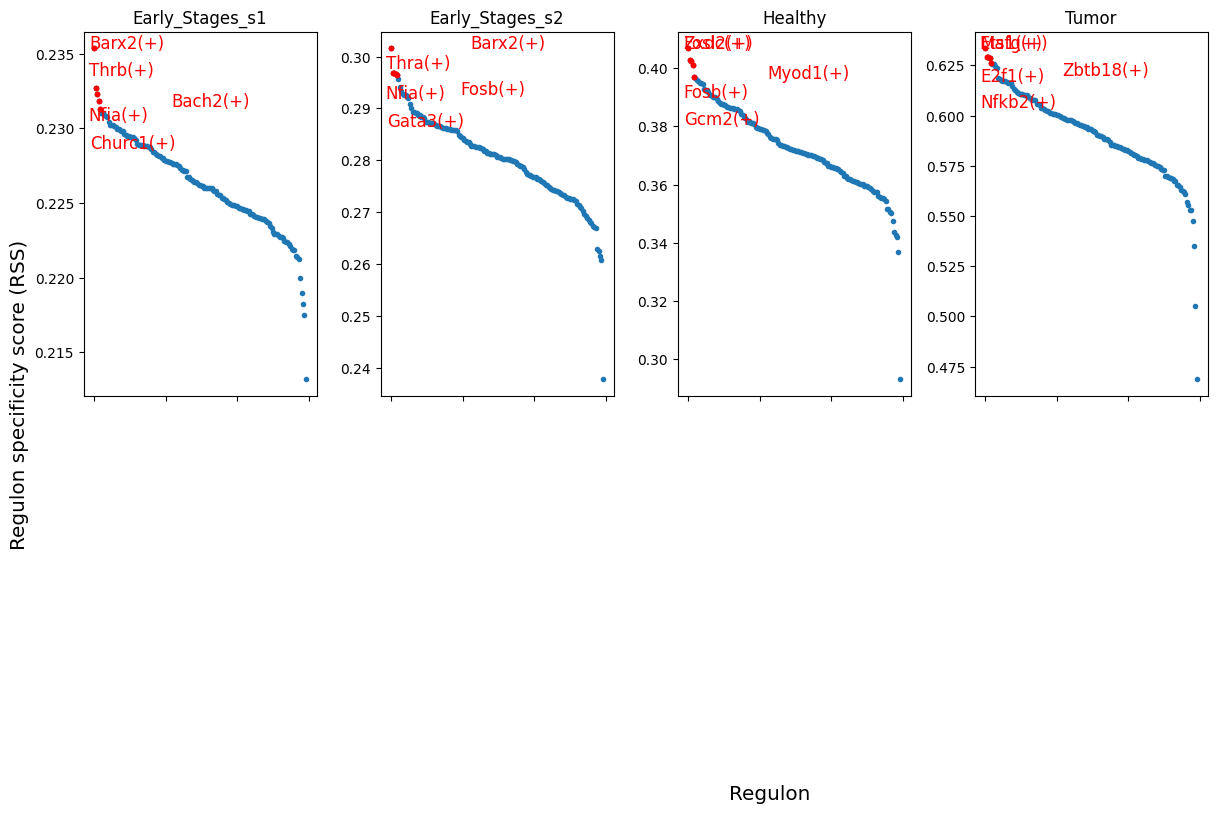

In [12]:
cats = sorted(list(set(cell_annot['Stade'])))

fig = plt.figure(figsize=(15, 8))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(2,5,num)
    plot_rss(rss_cellType, c, top_n=5, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })

In [13]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:5].index)
    )
topreg = list(set(topreg))

In [14]:
auc_mtx_Z = pd.DataFrame( index=df.index )
for col in list(df.columns):
    auc_mtx_Z[ col ] = ( df[col] - df[col].mean()) / df[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

/var/folders/0l/5dgm9v295cz3jngvfm2pmflh0000gn/T/ipykernel_3864/1246312377.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  auc_mtx_Z[ col ] = ( df[col] - df[col].mean()) / df[col].std(ddof=0)
/var/folders/0l/5dgm9v295cz3jngvfm2pmflh0000gn/T/ipykernel_3864/1246312377.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  auc_mtx_Z[ col ] = ( df[col] - df[col].mean()) / df[col].std(ddof=0)
/var/folders/0l/5dgm9v295cz3jngvfm2pmflh0000gn/T/ipykernel_3864/1246312377.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is 

In [15]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [16]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in cell_annot['Stade'] ]

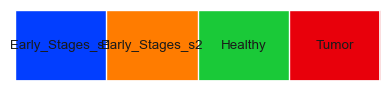

In [17]:
sns.set()
sns.set(font_scale=0.8)
fig = palplot(colors, cats, size=1.0)

/Users/mscavino/miniconda3/envs/pyscenic/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/mscavino/miniconda3/envs/pyscenic/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 16.04444444444419, '')

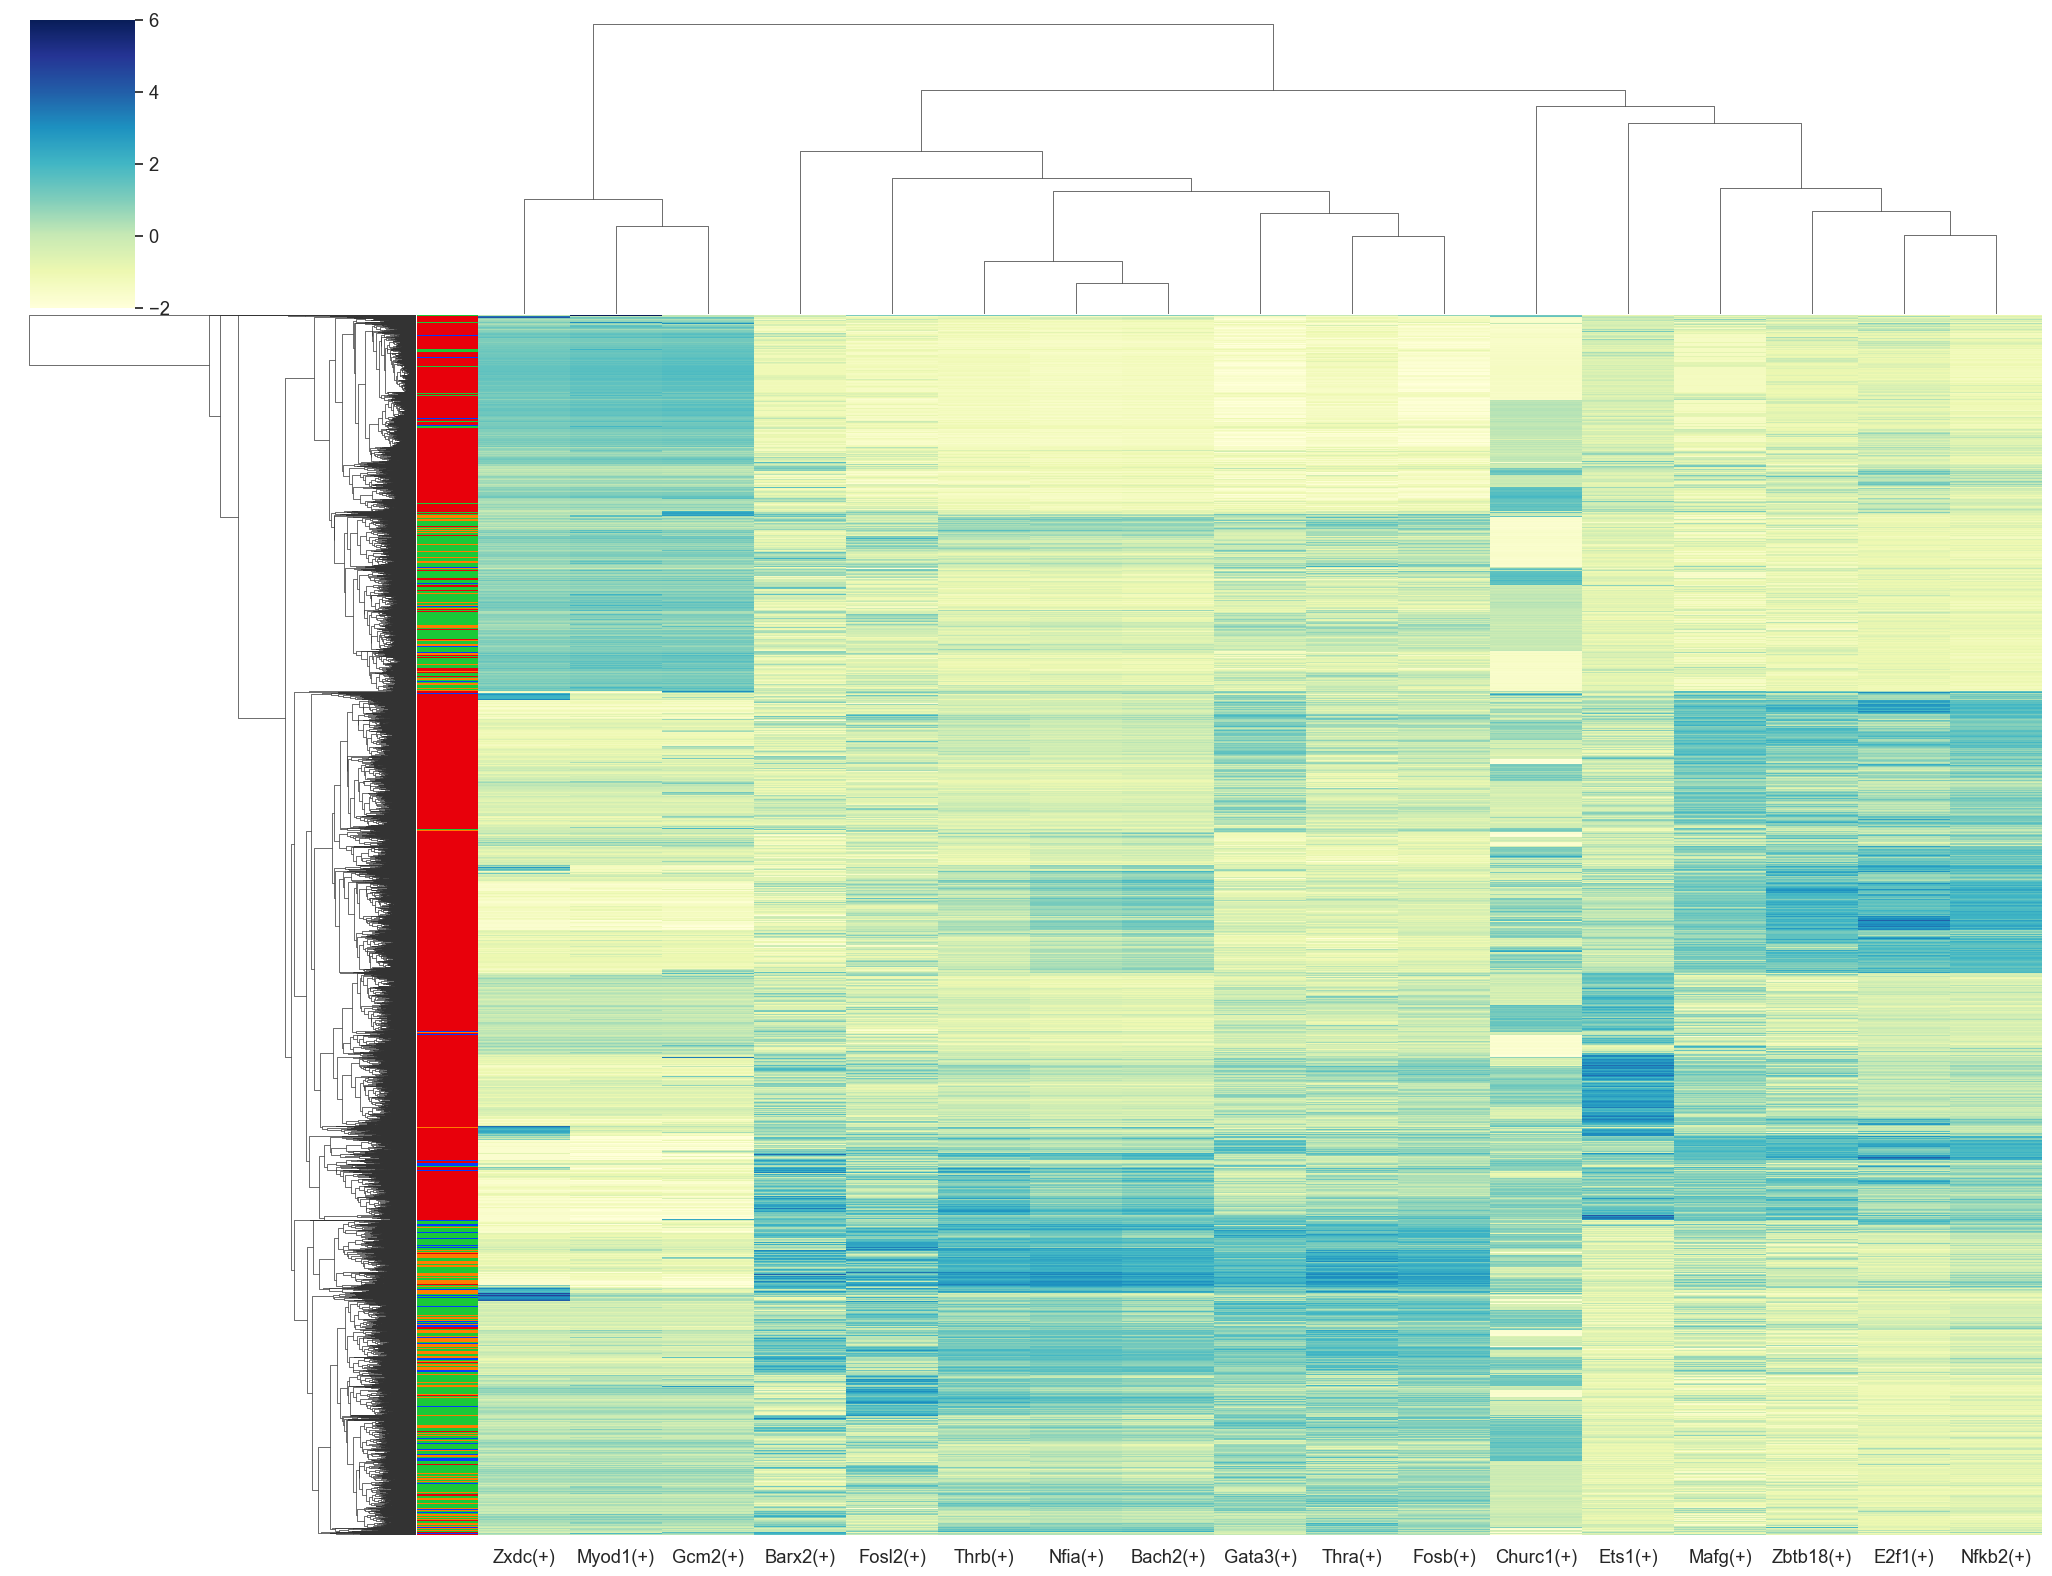

In [18]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, row_colors = colormap,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')

In [ ]:
binary_mtx, auc_thresholds = binarize(df)
binary_mtx.head()

In [ ]:
# select regulons:
r = topreg

fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=150, sharey=False)
for i,ax in enumerate(axs):
    sns.distplot(df[ r[i] ], ax=ax, norm_hist=True, bins=100)
    ax.plot( [ auc_thresholds[ r[i] ] ]*2, ax.get_ylim(), 'r:')
    ax.title.set_text( r[i] )
    ax.set_xlabel('')
    
fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='large')
fig.text(0.5, -0.01, 'AUC', ha='center', va='center', rotation='horizontal', size='large')

fig.tight_layout()

# Normalized data

In [4]:
df = pd.read_csv("../data/SCENIC/pyscenic_output.csv", index_col = 0)
df

,Acaa1b(+),Atf3(+),Bach2(+),Batf3(+),Bcl6(+),Bhlhe40(+),Cebpd(+),Dbp(+),E2f1(+),Ebf1(+),...,Sox4(+),Sox5(+),Sox8(+),Spib(+),Stat1(+),Stat5a(+),Tcf7l2(+),Thrb(+),Zfp12(+),Zfp710(+)
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGCTCAACCACAT-1_1,0.000000,0.025444,0.015309,0.006866,0.000000,0.081250,0.026898,0.000000,0.027628,0.014573,...,0.027918,0.016276,0.026843,0.023596,0.072929,0.029876,0.000558,0.014490,0.000000,0.000000
AAAGTGAGTGAATAAC-1_1,0.000000,0.007669,0.000000,0.000000,0.000000,0.000000,0.008532,0.000000,0.081013,0.000000,...,0.035271,0.000000,0.022236,0.028946,0.078751,0.009358,0.000000,0.000000,0.027778,0.000000
AACAAAGCATAGATGA-1_1,0.000000,0.000645,0.008170,0.000000,0.022059,0.005469,0.005482,0.023047,0.033428,0.007812,...,0.086167,0.015234,0.008413,0.016367,0.035856,0.034083,0.000000,0.014320,0.032986,0.000000
AACCAACGTGGGAGAG-1_1,0.000000,0.004874,0.004191,0.000000,0.054688,0.152344,0.014289,0.000000,0.036790,0.022686,...,0.062960,0.001823,0.026442,0.020498,0.086527,0.023094,0.000000,0.006110,0.146701,0.000000
AACTTCTTCCAGCAAT-1_1,0.032552,0.000000,0.002064,0.000000,0.000000,0.000000,0.000000,0.000000,0.103670,0.007512,...,0.070542,0.000000,0.000000,0.015572,0.088554,0.006696,0.000000,0.002251,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45p_GM4D_GTAGATCAGCTGAAAT-1,0.000000,0.006522,0.020700,0.006155,0.186121,0.000000,0.032072,0.000000,0.006297,0.018780,...,0.008502,0.046354,0.004006,0.021133,0.013709,0.024639,0.000000,0.036566,0.083333,0.315104
45p_GM4D_TAGGTACAGCAGGCTA-1,0.186198,0.008816,0.067533,0.000000,0.000000,0.087500,0.015831,0.000000,0.003433,0.047476,...,0.014706,0.042578,0.000000,0.001324,0.003132,0.066277,0.001674,0.064524,0.000000,0.000000
45p_GM4D_TCTACATGTCTATGAC-1,0.000000,0.039278,0.042200,0.000000,0.000000,0.000000,0.026282,0.000000,0.007765,0.042969,...,0.038258,0.046224,0.011218,0.013189,0.008070,0.015968,0.011161,0.035903,0.098958,0.000000


In [5]:
rss_cellType = regulon_specificity_scores(df, cell_annot['Stade'] )
rss_cellType

,Acaa1b(+),Atf3(+),Bach2(+),Batf3(+),Bcl6(+),Bhlhe40(+),Cebpd(+),Dbp(+),E2f1(+),Ebf1(+),...,Sox4(+),Sox5(+),Sox8(+),Spib(+),Stat1(+),Stat5a(+),Tcf7l2(+),Thrb(+),Zfp12(+),Zfp710(+)
Tumor,0.271231,0.391748,0.395320,0.587232,0.374694,0.347504,0.419094,0.452659,0.668502,0.490257,...,0.567717,0.431680,0.524493,0.621223,0.656895,0.478487,0.197284,0.394602,0.426379,0.243472
Healthy,0.325650,0.479451,0.467805,0.267519,0.350428,0.322063,0.462470,0.287540,0.257904,0.360833,...,0.289288,0.392111,0.207782,0.287790,0.281207,0.399128,0.378167,0.470740,0.239028,0.239080
Early_Stages_s1,0.225835,0.220678,0.243939,0.204220,0.236361,0.210573,0.232506,0.215991,0.201067,0.230225,...,0.215097,0.233819,0.182060,0.203459,0.208578,0.233757,0.227907,0.248597,0.201321,0.203167
Early_Stages_s2,0.261513,0.278271,0.351224,0.215091,0.271095,0.235979,0.307517,0.245867,0.210914,0.283075,...,0.235333,0.313487,0.187177,0.228558,0.226005,0.295422,0.376729,0.342983,0.216034,0.235481


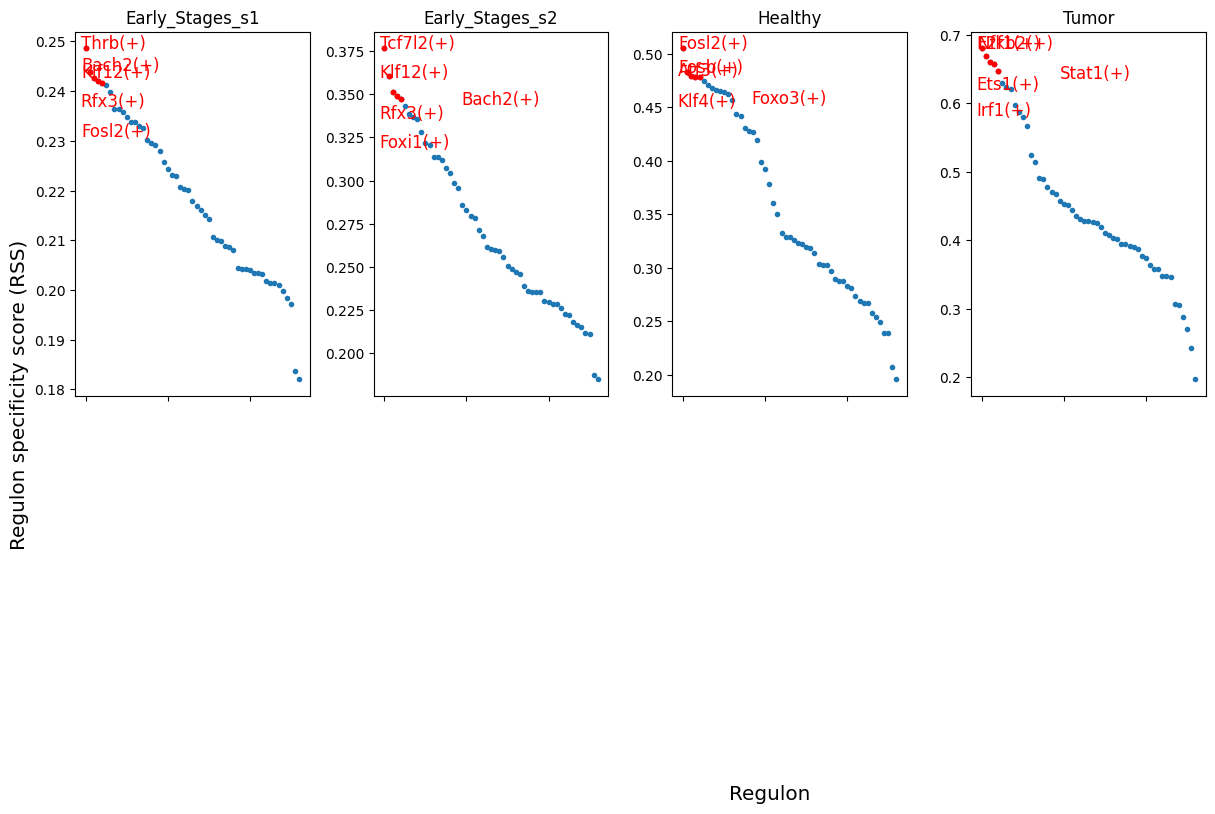

In [6]:
cats = sorted(list(set(cell_annot['Stade'])))

fig = plt.figure(figsize=(15, 8))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(2,5,num)
    plot_rss(rss_cellType, c, top_n=5, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })

In [7]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:5].index)
    )
topreg = list(set(topreg))

In [8]:
auc_mtx_Z = pd.DataFrame( index=df.index )
for col in list(df.columns):
    auc_mtx_Z[ col ] = ( df[col] - df[col].mean()) / df[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

In [9]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in cell_annot['Stade'] ]

/Users/mscavino/miniconda3/envs/pyscenic/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/mscavino/miniconda3/envs/pyscenic/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 16.04444444444419, '')

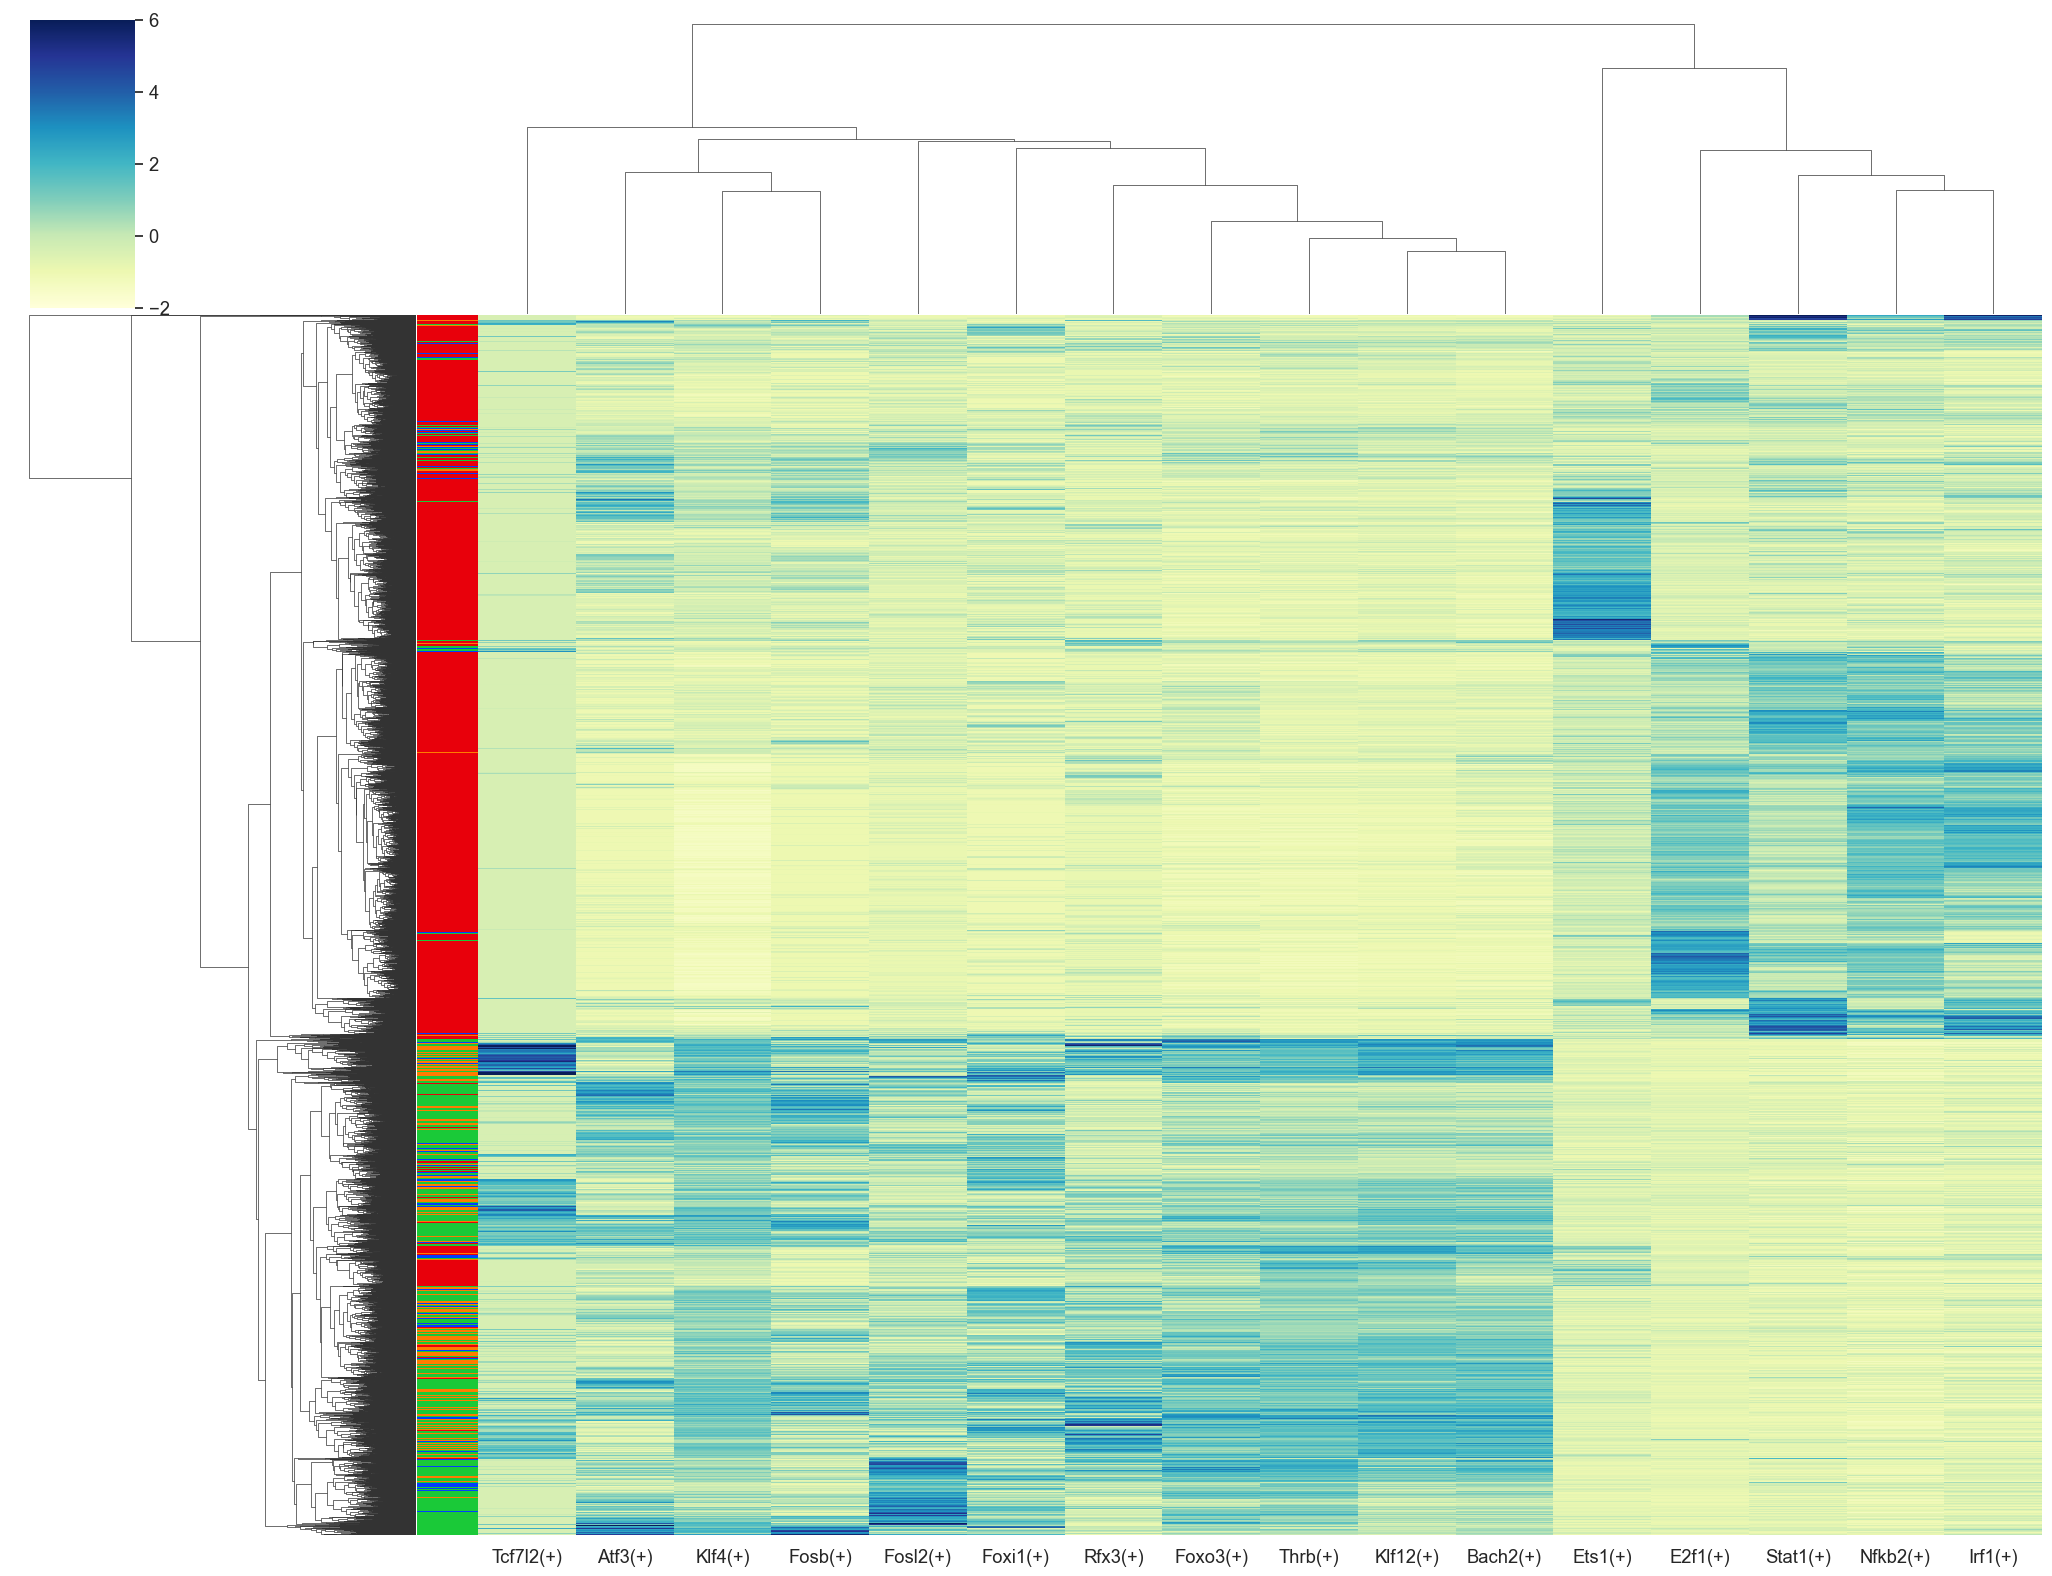

In [10]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, row_colors = colormap,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')

<Axes: >

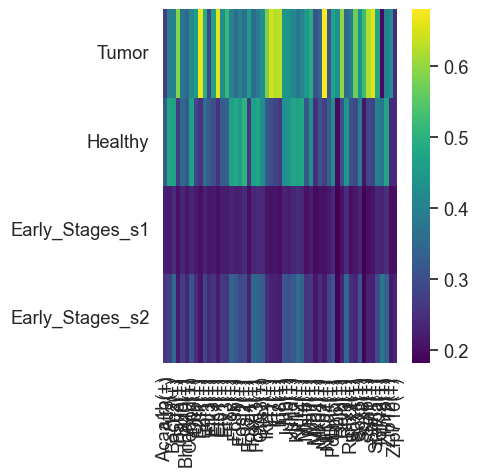

In [11]:
sns.heatmap(rss_cellType, cmap = "viridis", xticklabels=1, yticklabels=1 )

In [12]:
binary_mtx, auc_thresholds = binarize(df)
binary_mtx.head()

,Acaa1b(+),Atf3(+),Bach2(+),Batf3(+),Bcl6(+),Bhlhe40(+),Cebpd(+),Dbp(+),E2f1(+),Ebf1(+),...,Sox4(+),Sox5(+),Sox8(+),Spib(+),Stat1(+),Stat5a(+),Tcf7l2(+),Thrb(+),Zfp12(+),Zfp710(+)
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGCTCAACCACAT-1_1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGTGAGTGAATAAC-1_1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
AACAAAGCATAGATGA-1_1,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
AACCAACGTGGGAGAG-1_1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
AACTTCTTCCAGCAAT-1_1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


/var/folders/0l/5dgm9v295cz3jngvfm2pmflh0000gn/T/ipykernel_5488/2803630592.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[ r[i] ], ax=ax, norm_hist=True, bins=100)
/var/folders/0l/5dgm9v295cz3jngvfm2pmflh0000gn/T/ipykernel_5488/2803630592.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

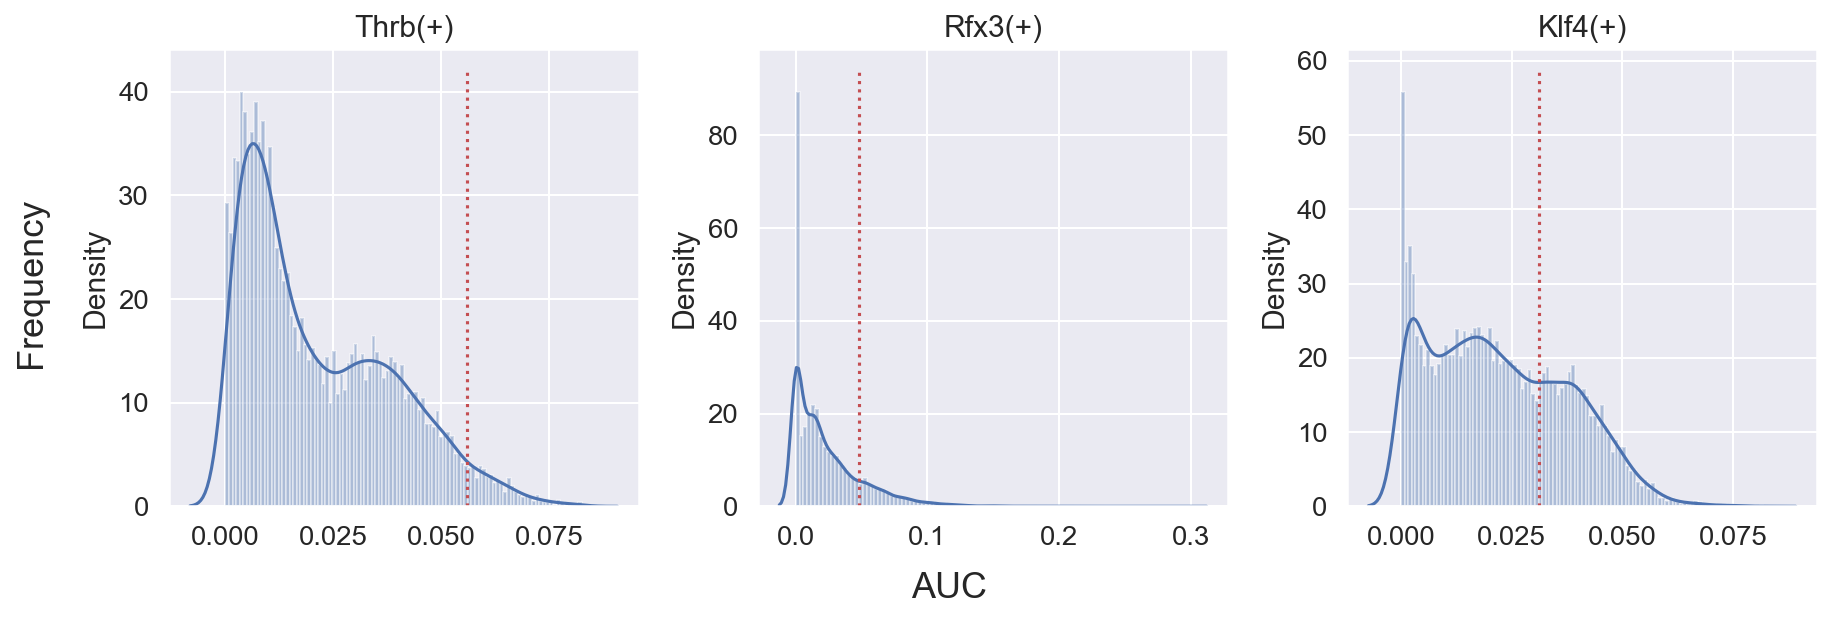

In [13]:
# select regulons:
r = topreg

fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=150, sharey=False)
for i,ax in enumerate(axs):
    sns.distplot(df[ r[i] ], ax=ax, norm_hist=True, bins=100)
    ax.plot( [ auc_thresholds[ r[i] ] ]*2, ax.get_ylim(), 'r:')
    ax.title.set_text( r[i] )
    ax.set_xlabel('')
    
fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='large')
fig.text(0.5, -0.01, 'AUC', ha='center', va='center', rotation='horizontal', size='large')

fig.tight_layout()

<Axes: ylabel='Cell'>

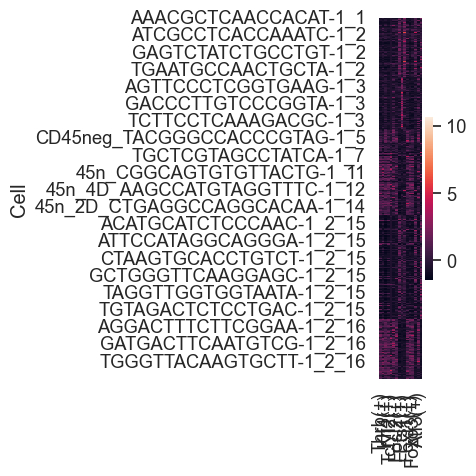

In [14]:
sns.heatmap(auc_mtx_Z[topreg])

In [15]:
auc_mtx_Z["Stade"] = cell_annot["Stade"]

In [16]:
auc_mtx_Z_sorted = auc_mtx_Z.sort_values("Stade")

<Axes: ylabel='Cell'>

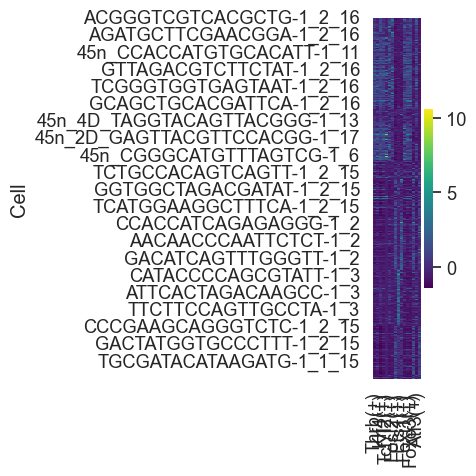

In [17]:
sns.heatmap(auc_mtx_Z_sorted[topreg], cmap = "viridis")

In [18]:
import scanpy as sc
import anndata

In [19]:
a = anndata.AnnData(X = auc_mtx_Z.iloc[:,:53], obs = adata_epi.obs)

/Users/mscavino/miniconda3/envs/pyscenic/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


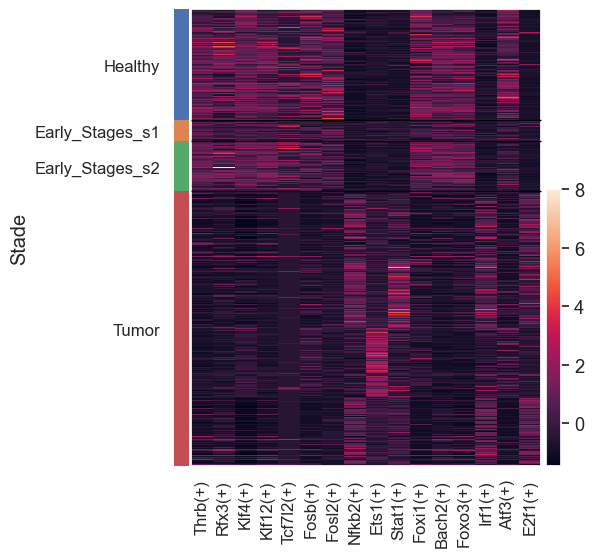

In [20]:
sc.pl.heatmap(a, var_names=topreg, groupby="Stade", vmax = 8)

<Axes: >

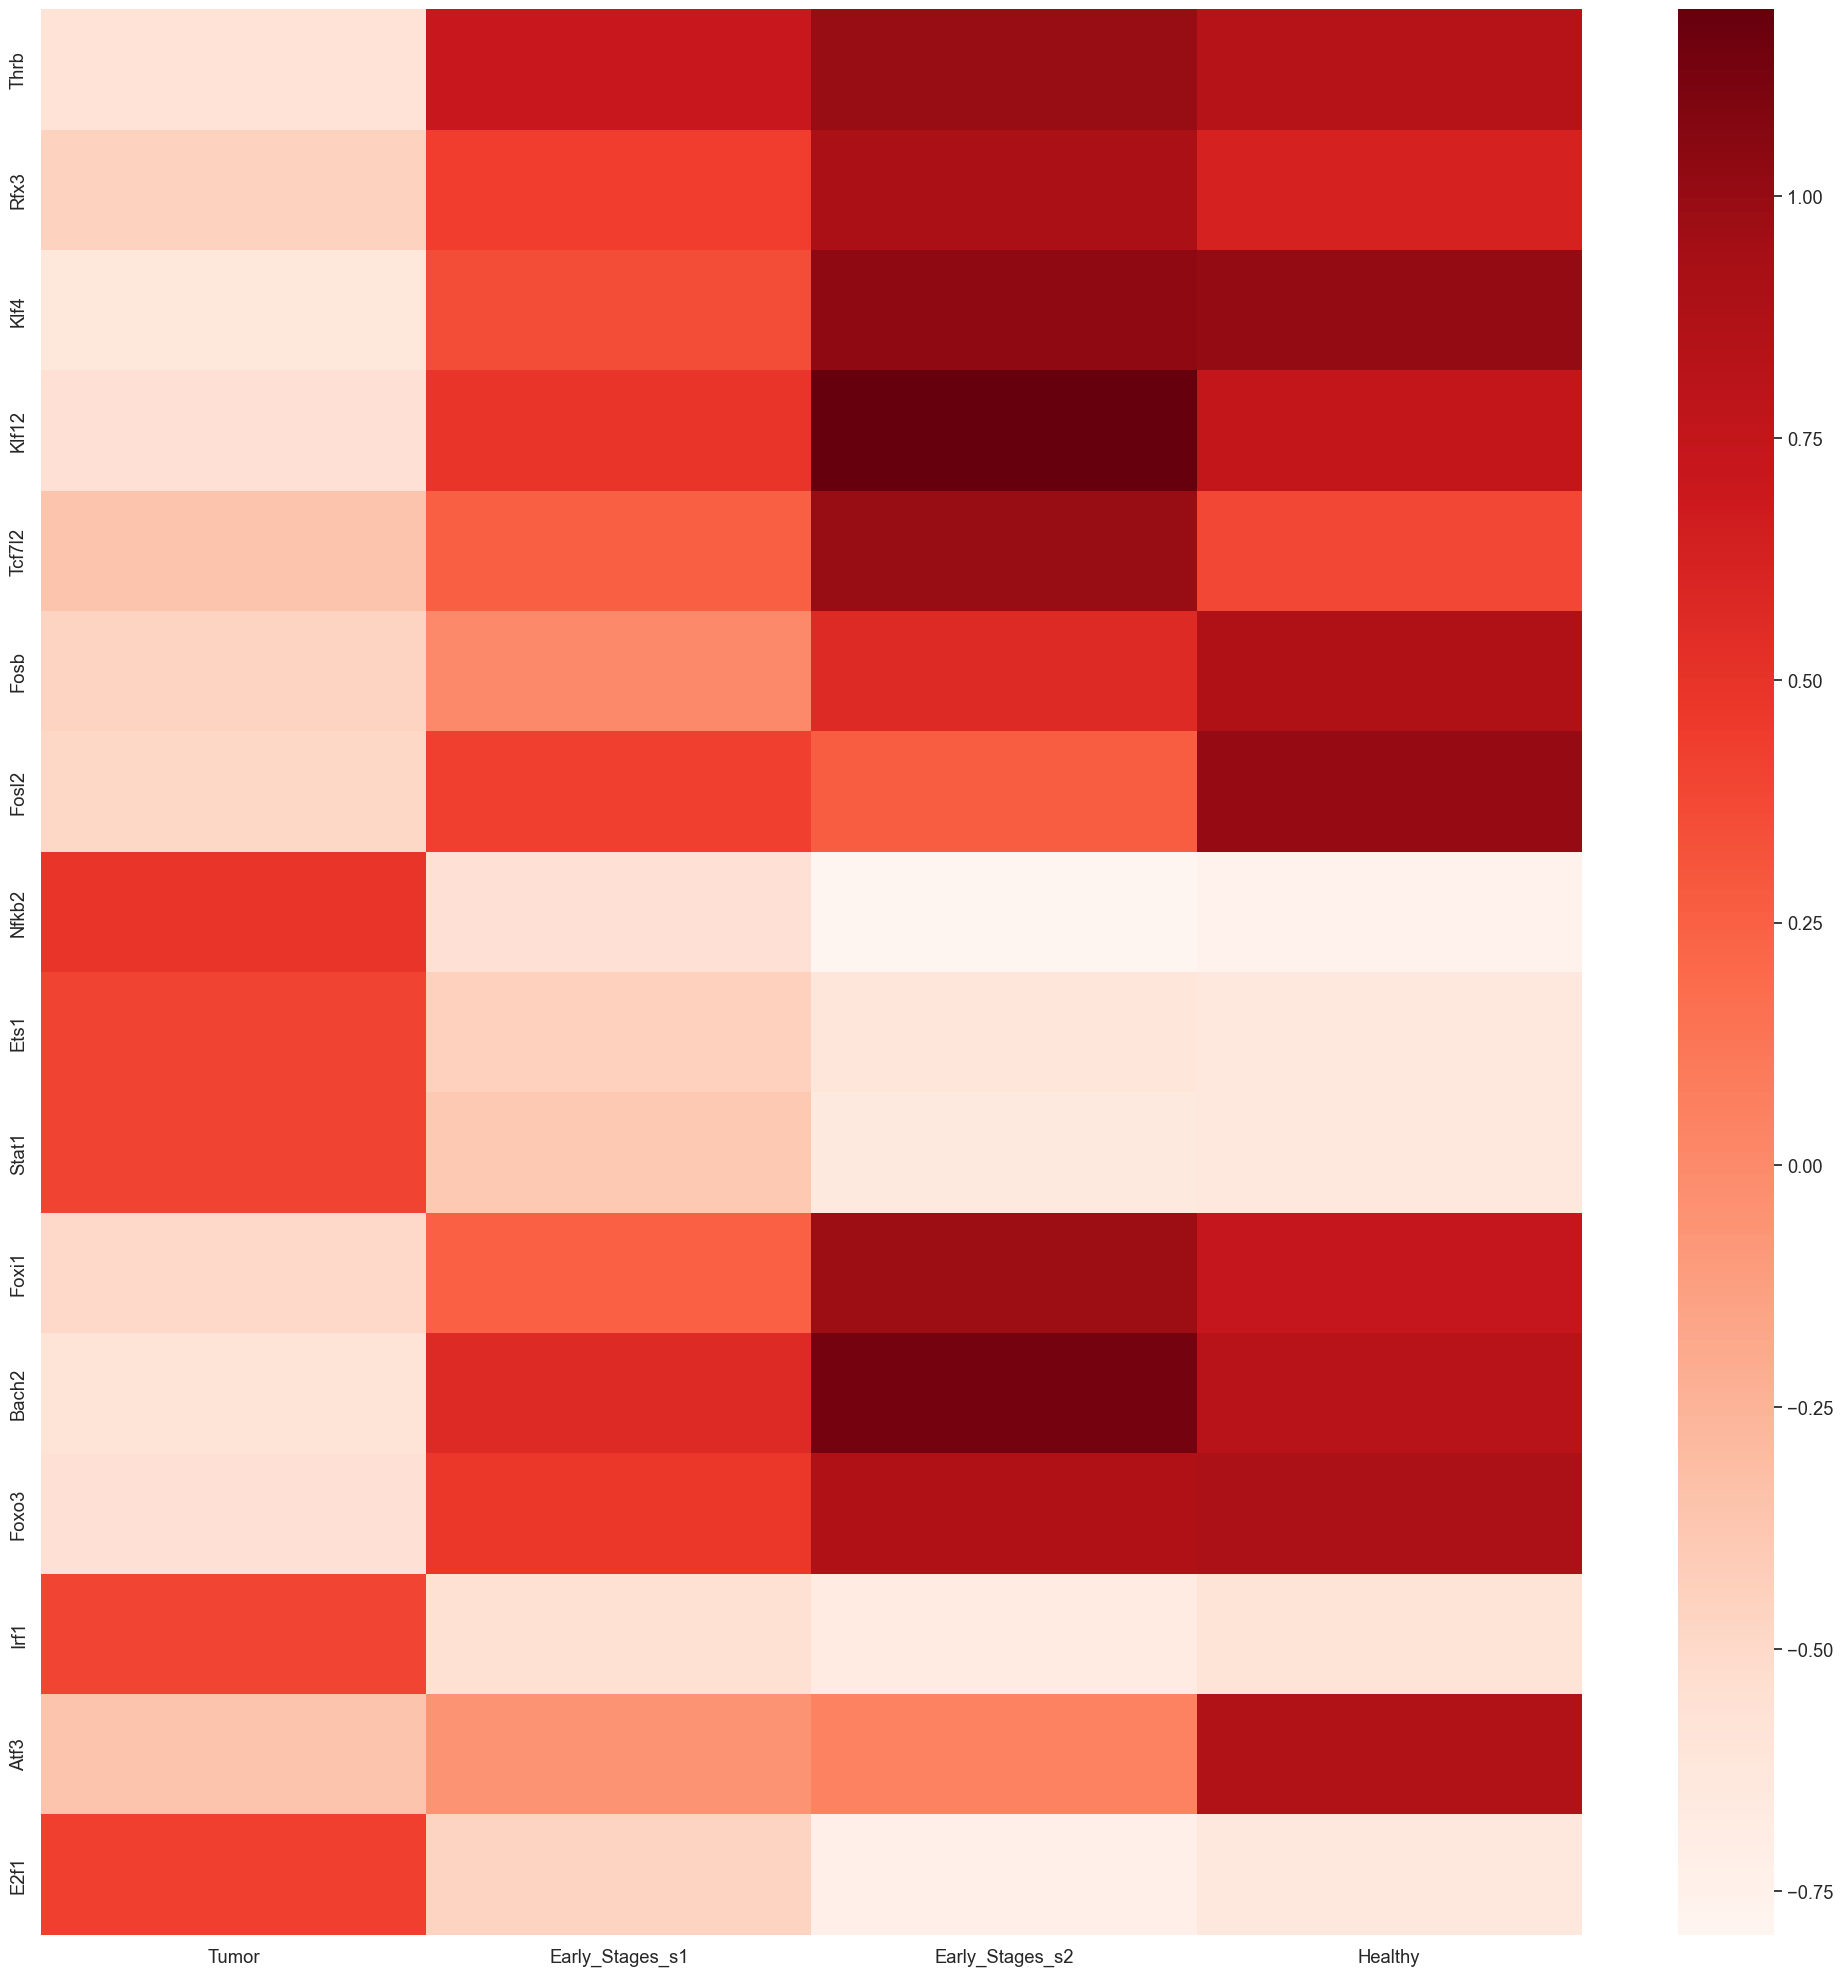

In [21]:
# Faire une fonctions pour faire un tile plot sur scanpy (prendre la moyenne de l'expression d'un regulon pour toutes les cellules d'un groupe)
import math

FIGSIZE=(20,20)
rcParams['figure.figsize']=FIGSIZE

dico = {"E2f1" : []}
cells = a.obs[a.obs["Stade"] == "Healthy"].index
gene_expr = a[cells, "E2f1(+)"].X.mean()

dico["E2f1"].append(gene_expr)

def tileplot(adata, groupby, var_names):
    dico = {}
    df = pd.DataFrame()
    for type in adata.obs[groupby].unique():
        dico[type] = {}
        cells = adata.obs[adata.obs[groupby] == type].index
        for gene in var_names:
            gene_expr = adata[cells, gene].X.mean()
            dico[type][gene[:-3]] = float(gene_expr)

        liste = [i for i in dico[type].values()]
        df[type] = liste
    index = [i for i in dico[type].keys()]
    df.index = index

    return(df.T)


test = tileplot(a, "Stade", topreg)

test.index = pd.CategoricalIndex(test.index, categories= ["Tumor", "Early_Stages_s1", "Early_Stages_s2", "Healthy"])
test.sort_index(level=0, inplace=True)

# sns.heatmap(test.T)


test.head()

test_diff = pd.DataFrame()

for col in test.T.columns:
    test_diff[col] = test.T[col] - test.T["Tumor"]

sns.heatmap(test.T, cmap = "Reds") 

<Axes: >

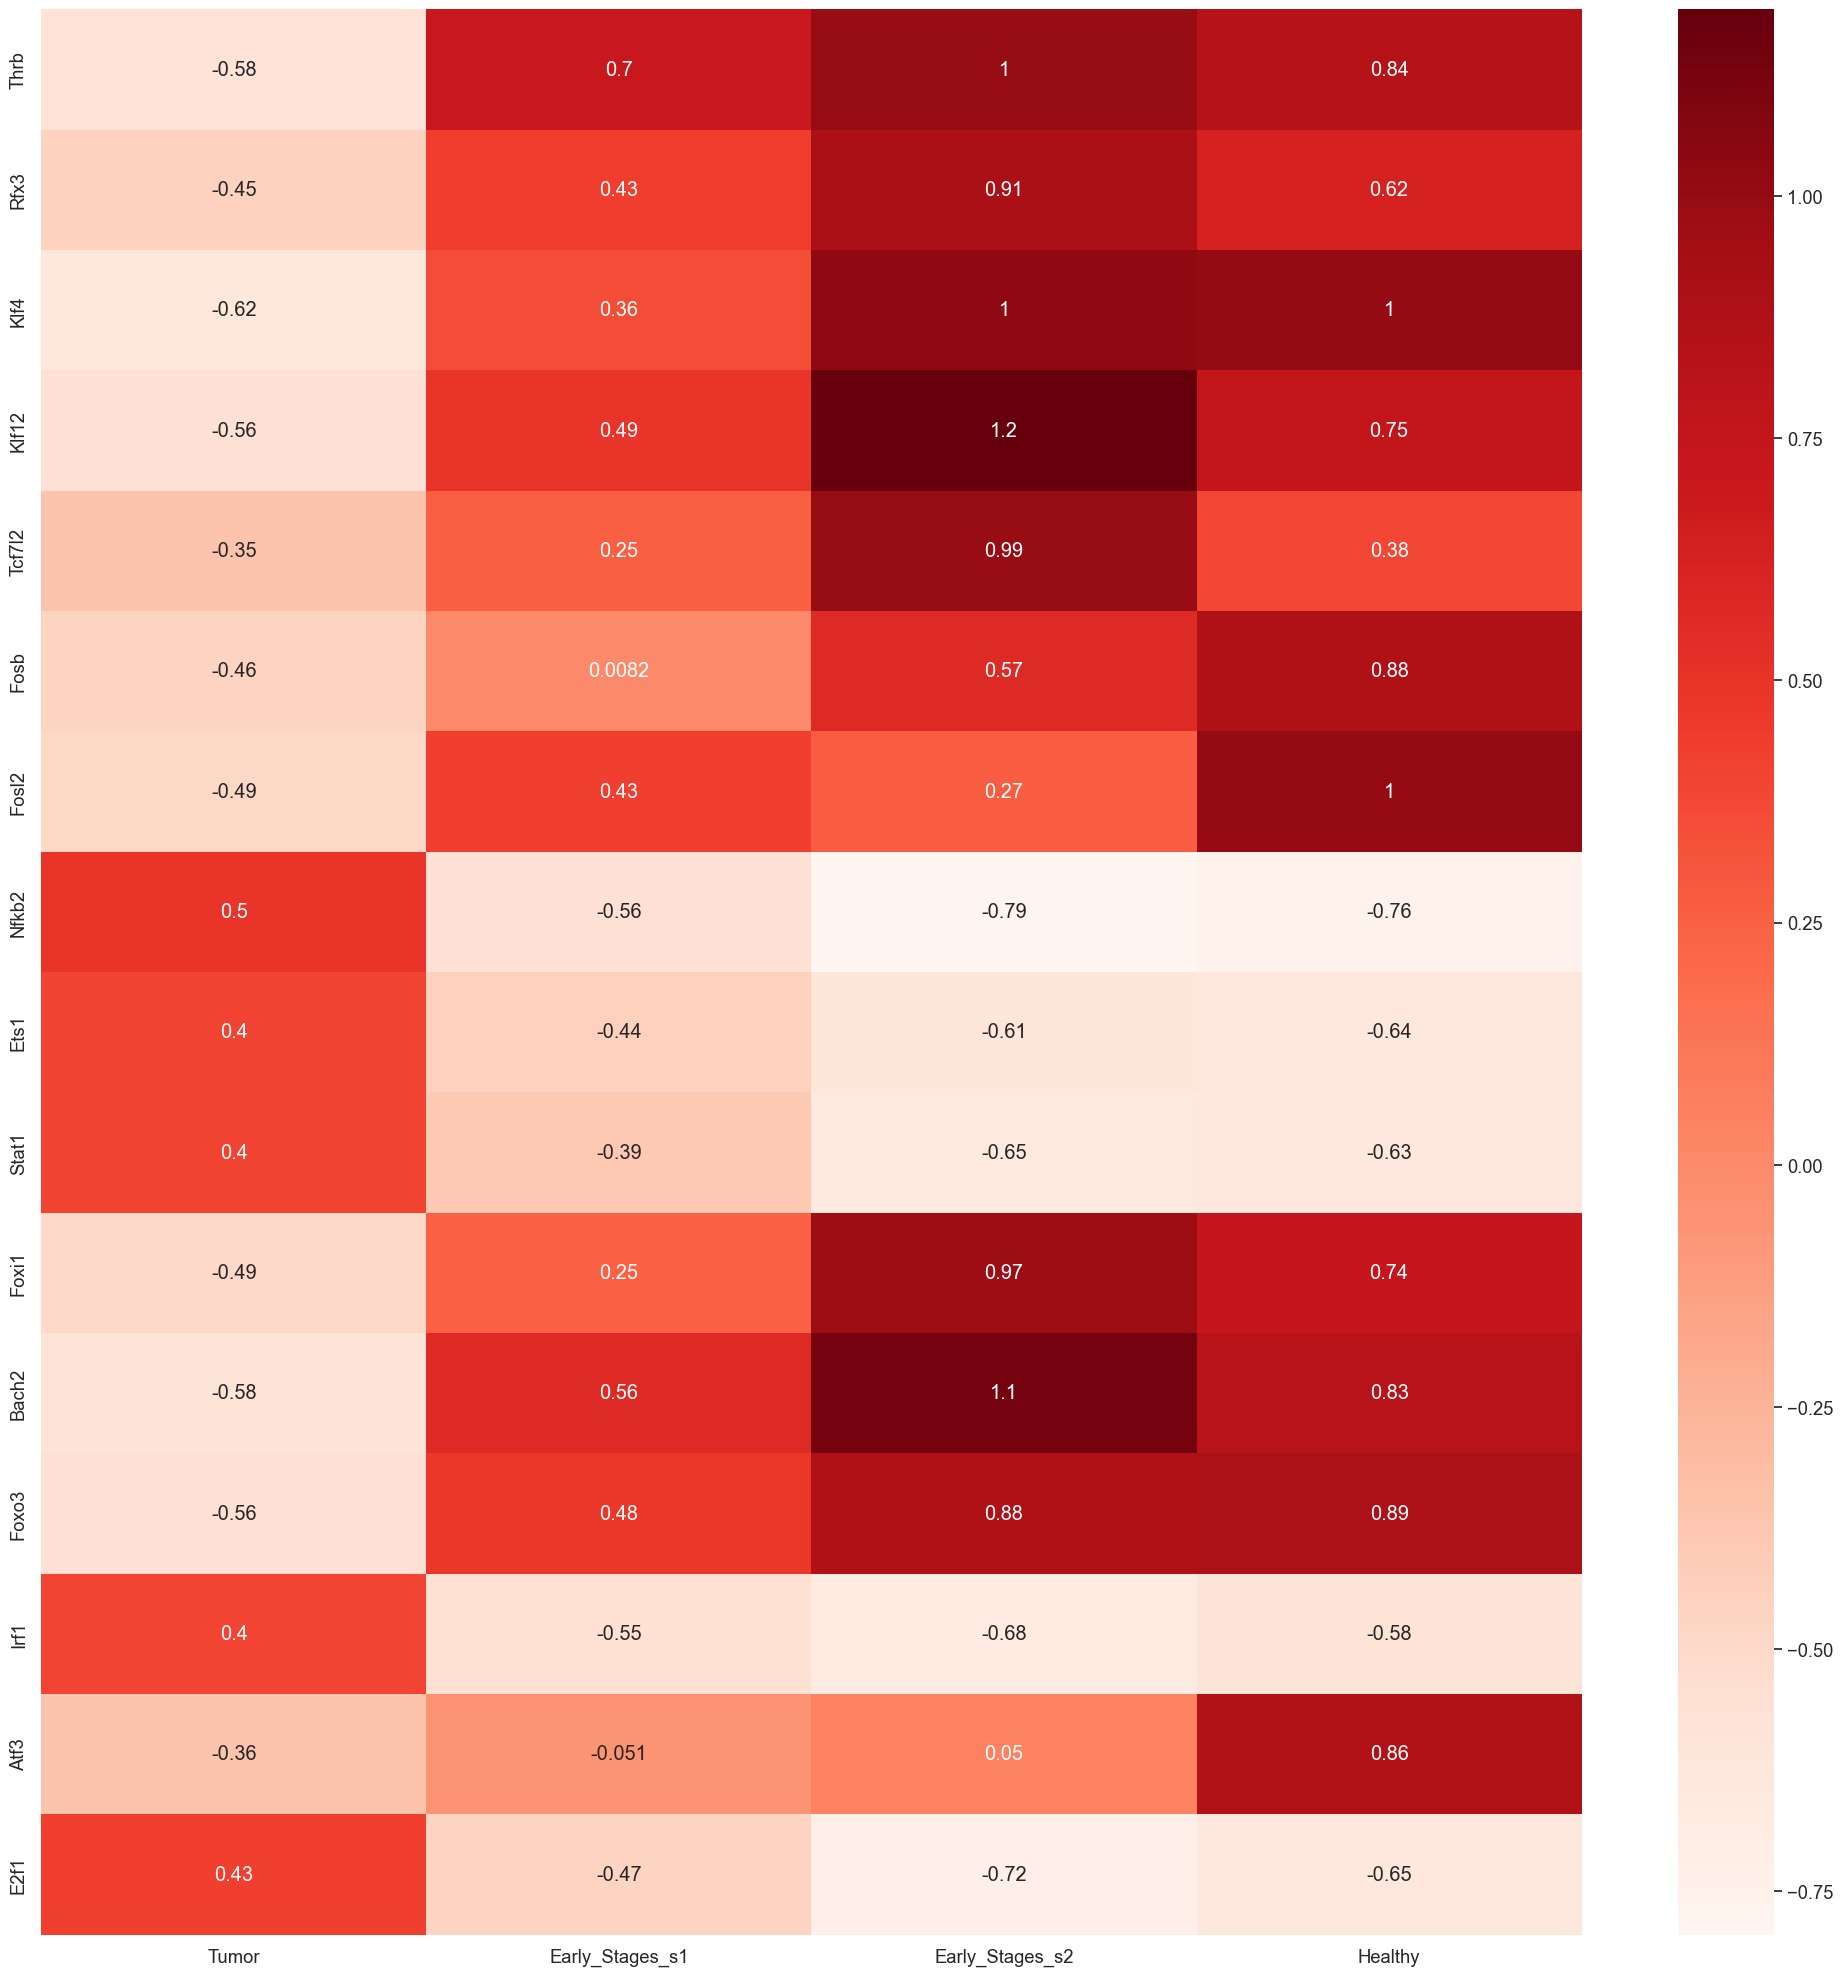

In [22]:
sns.heatmap(test.T, cmap = "Reds", annot = True) 

<Axes: >

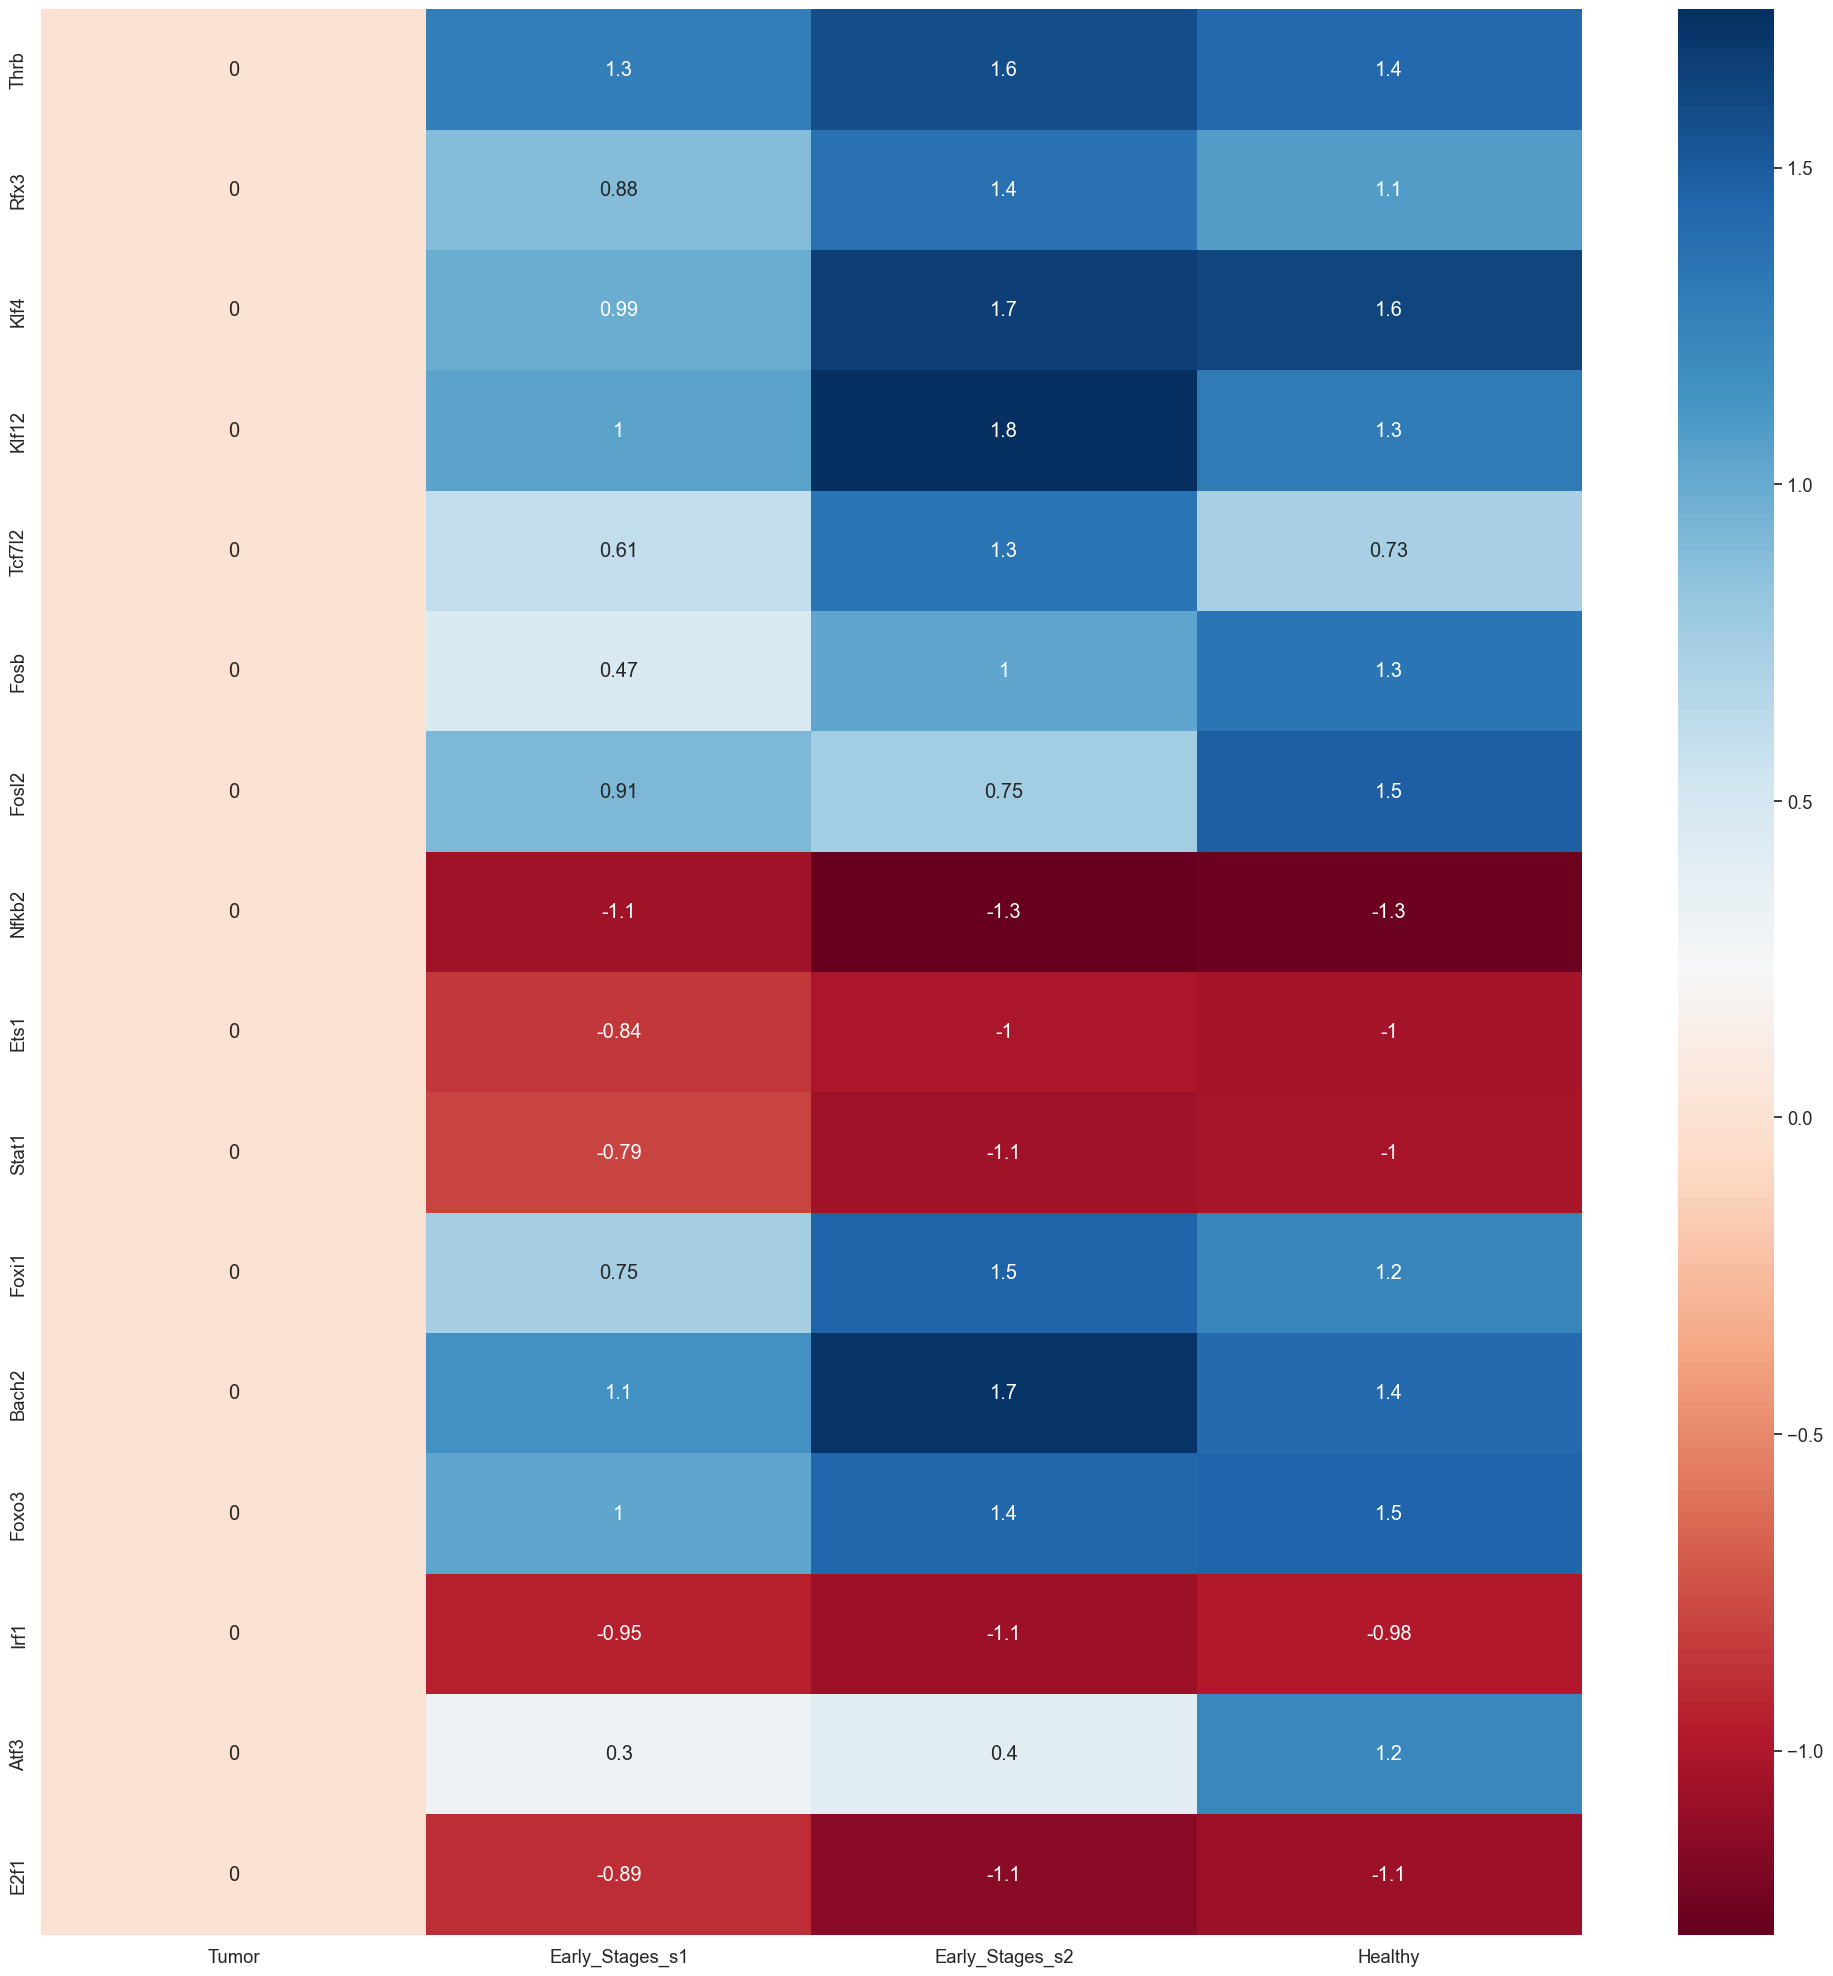

In [23]:
sns.heatmap(test_diff, cmap = "RdBu", annot = True) 

In [24]:
# Essayer de rajouter un test stat ?

<Axes: >

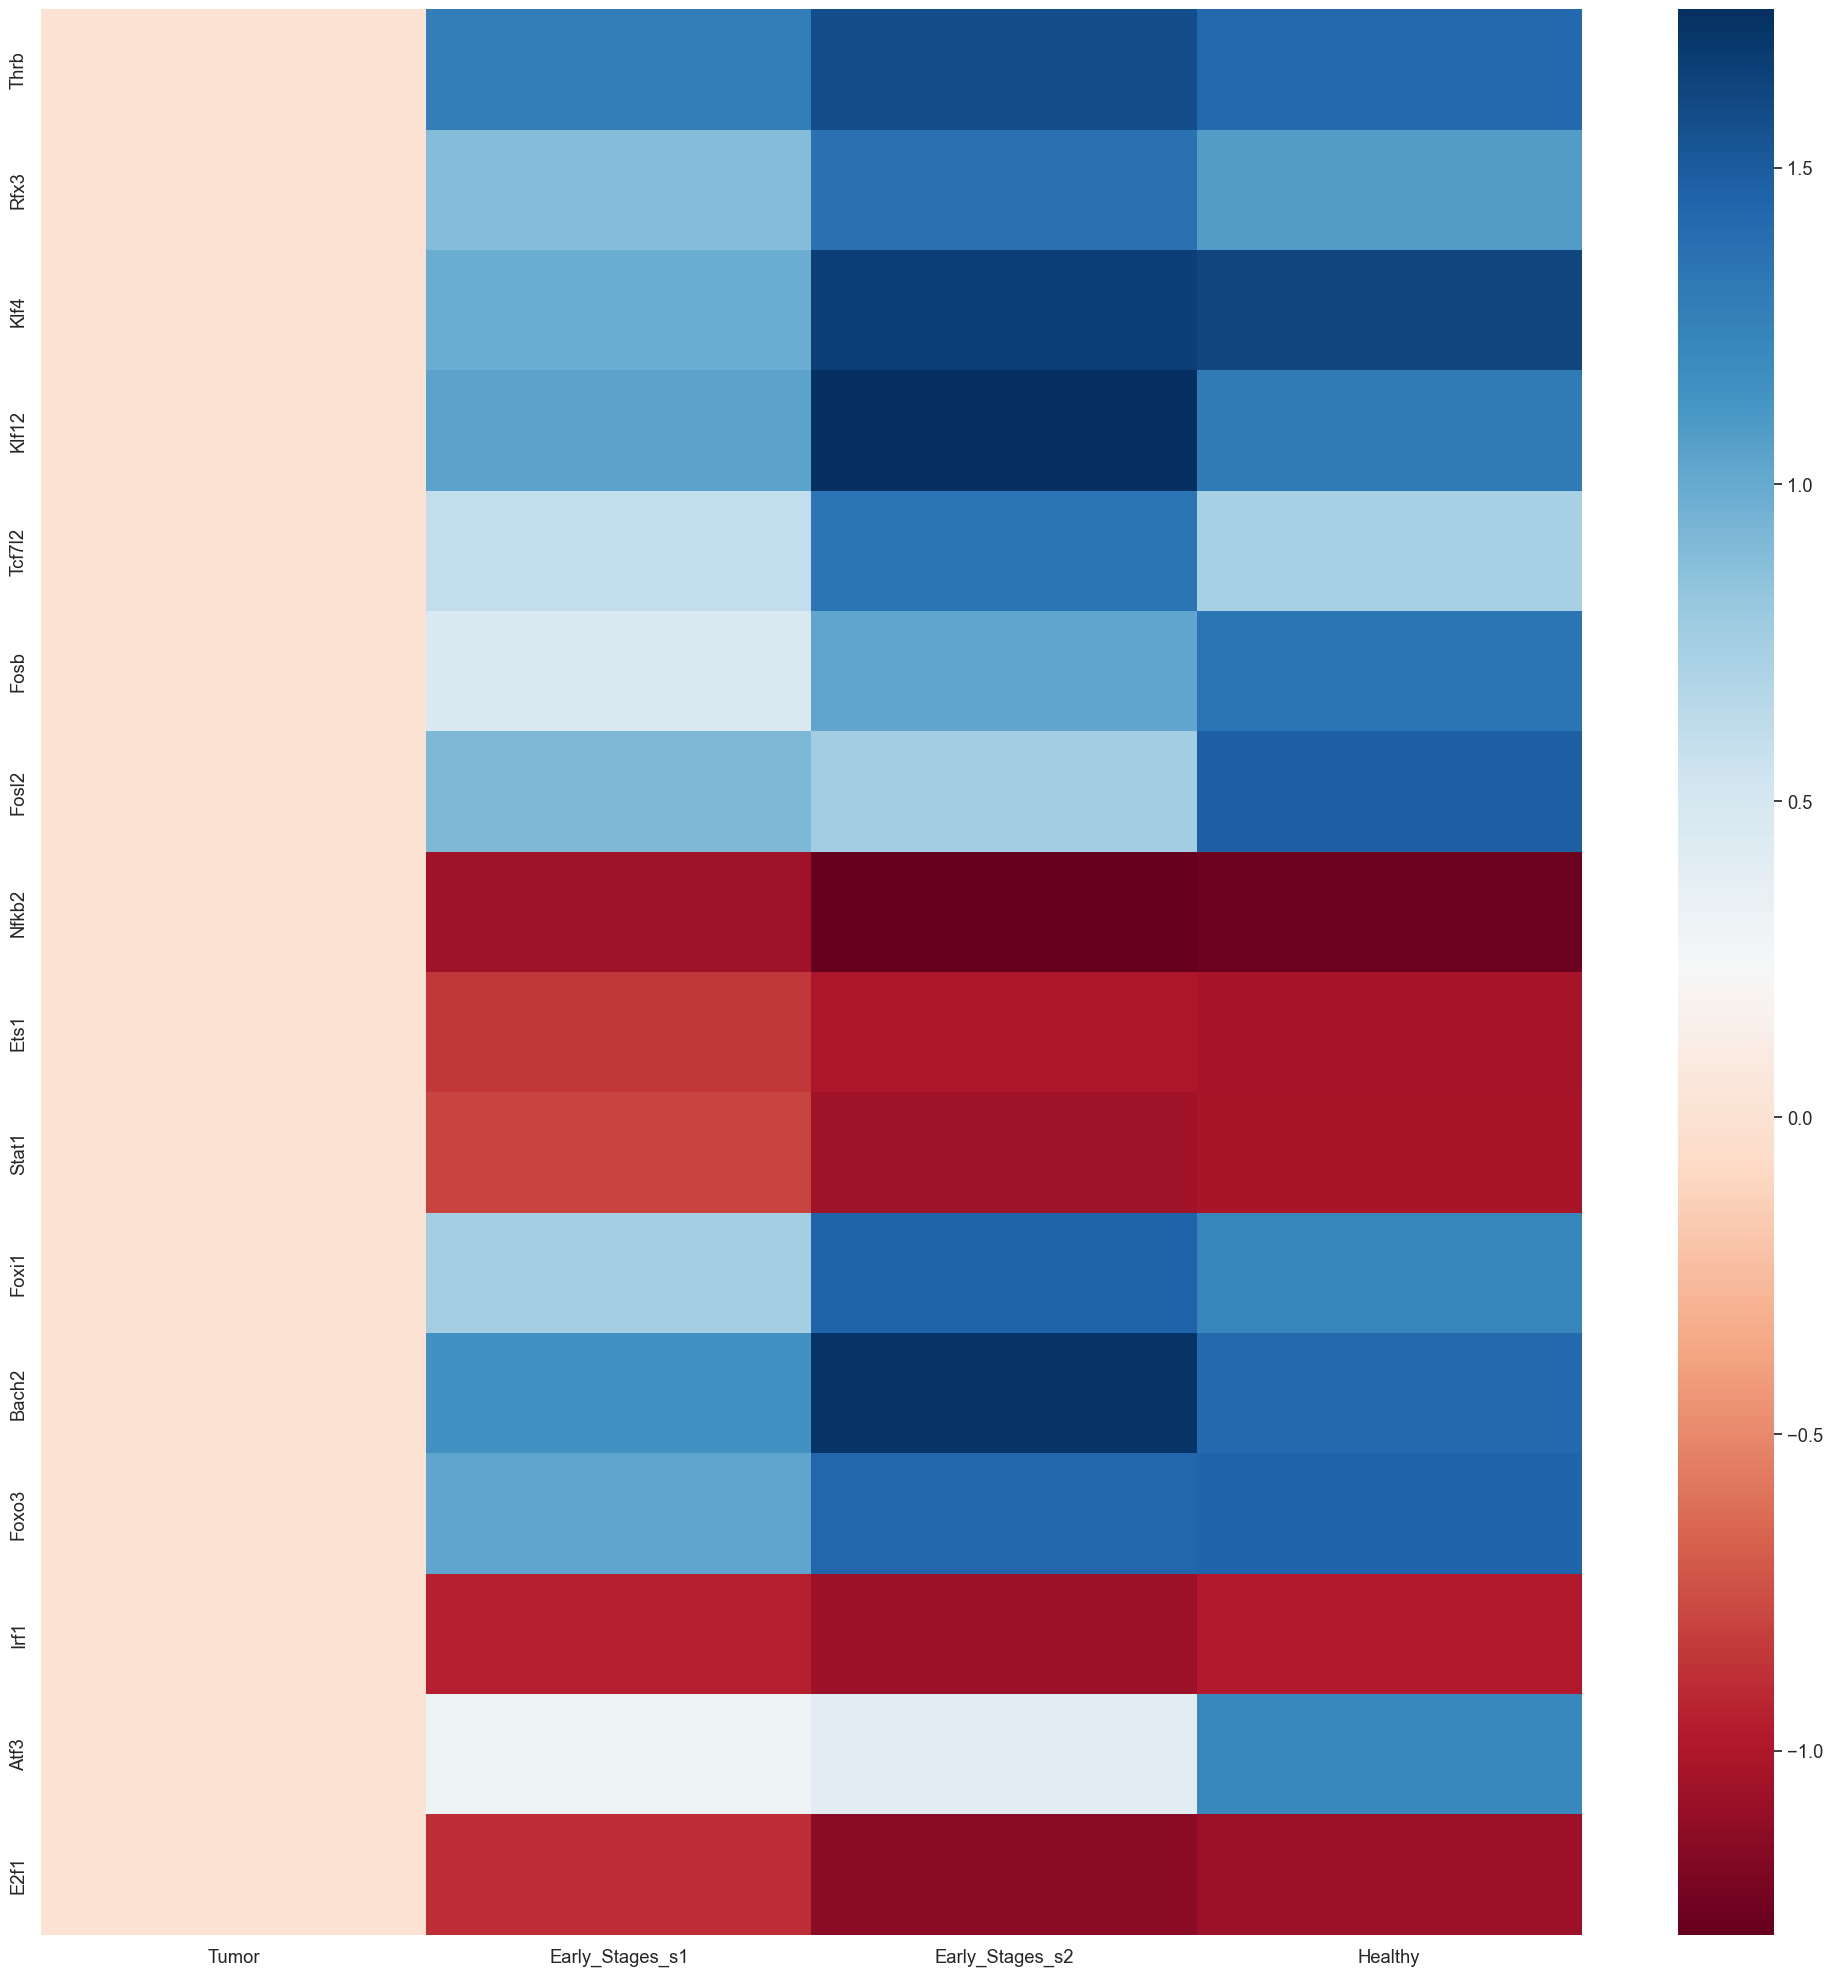

In [25]:
sns.heatmap(test_diff, cmap = "RdBu") 

/Users/mscavino/miniconda3/envs/pyscenic/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


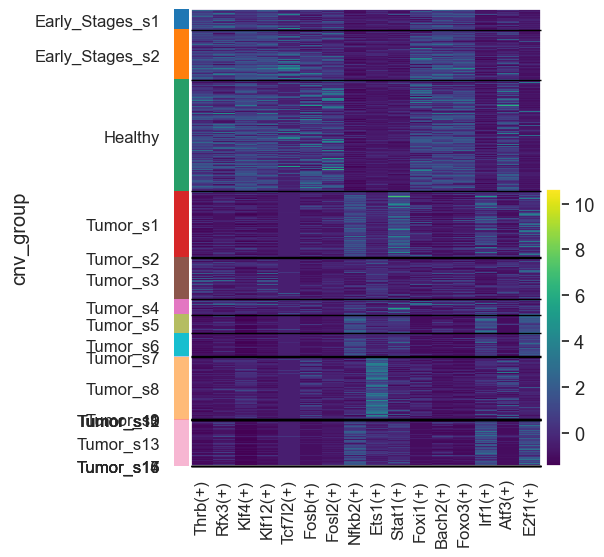

In [26]:
sc.pl.heatmap(a, var_names=topreg, groupby="cnv_group", cmap = "viridis")

/Users/mscavino/miniconda3/envs/pyscenic/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


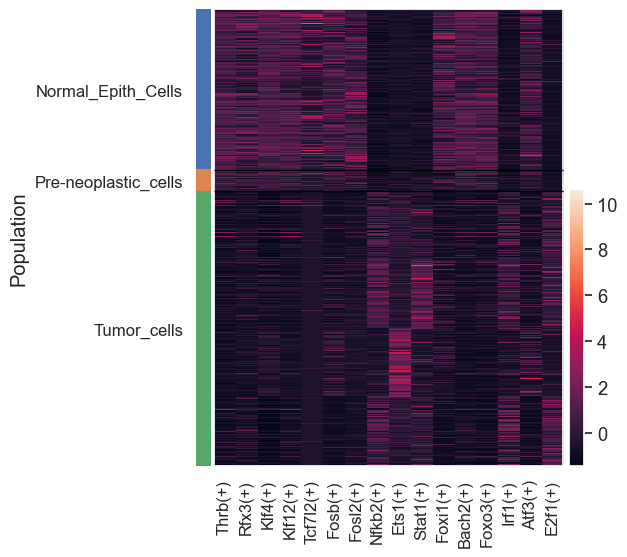

In [27]:
sc.pl.heatmap(a, var_names=topreg, groupby="Population")

/Users/mscavino/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Users/mscavino/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/Users/mscavino/miniconda3/envs/pyscenic/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


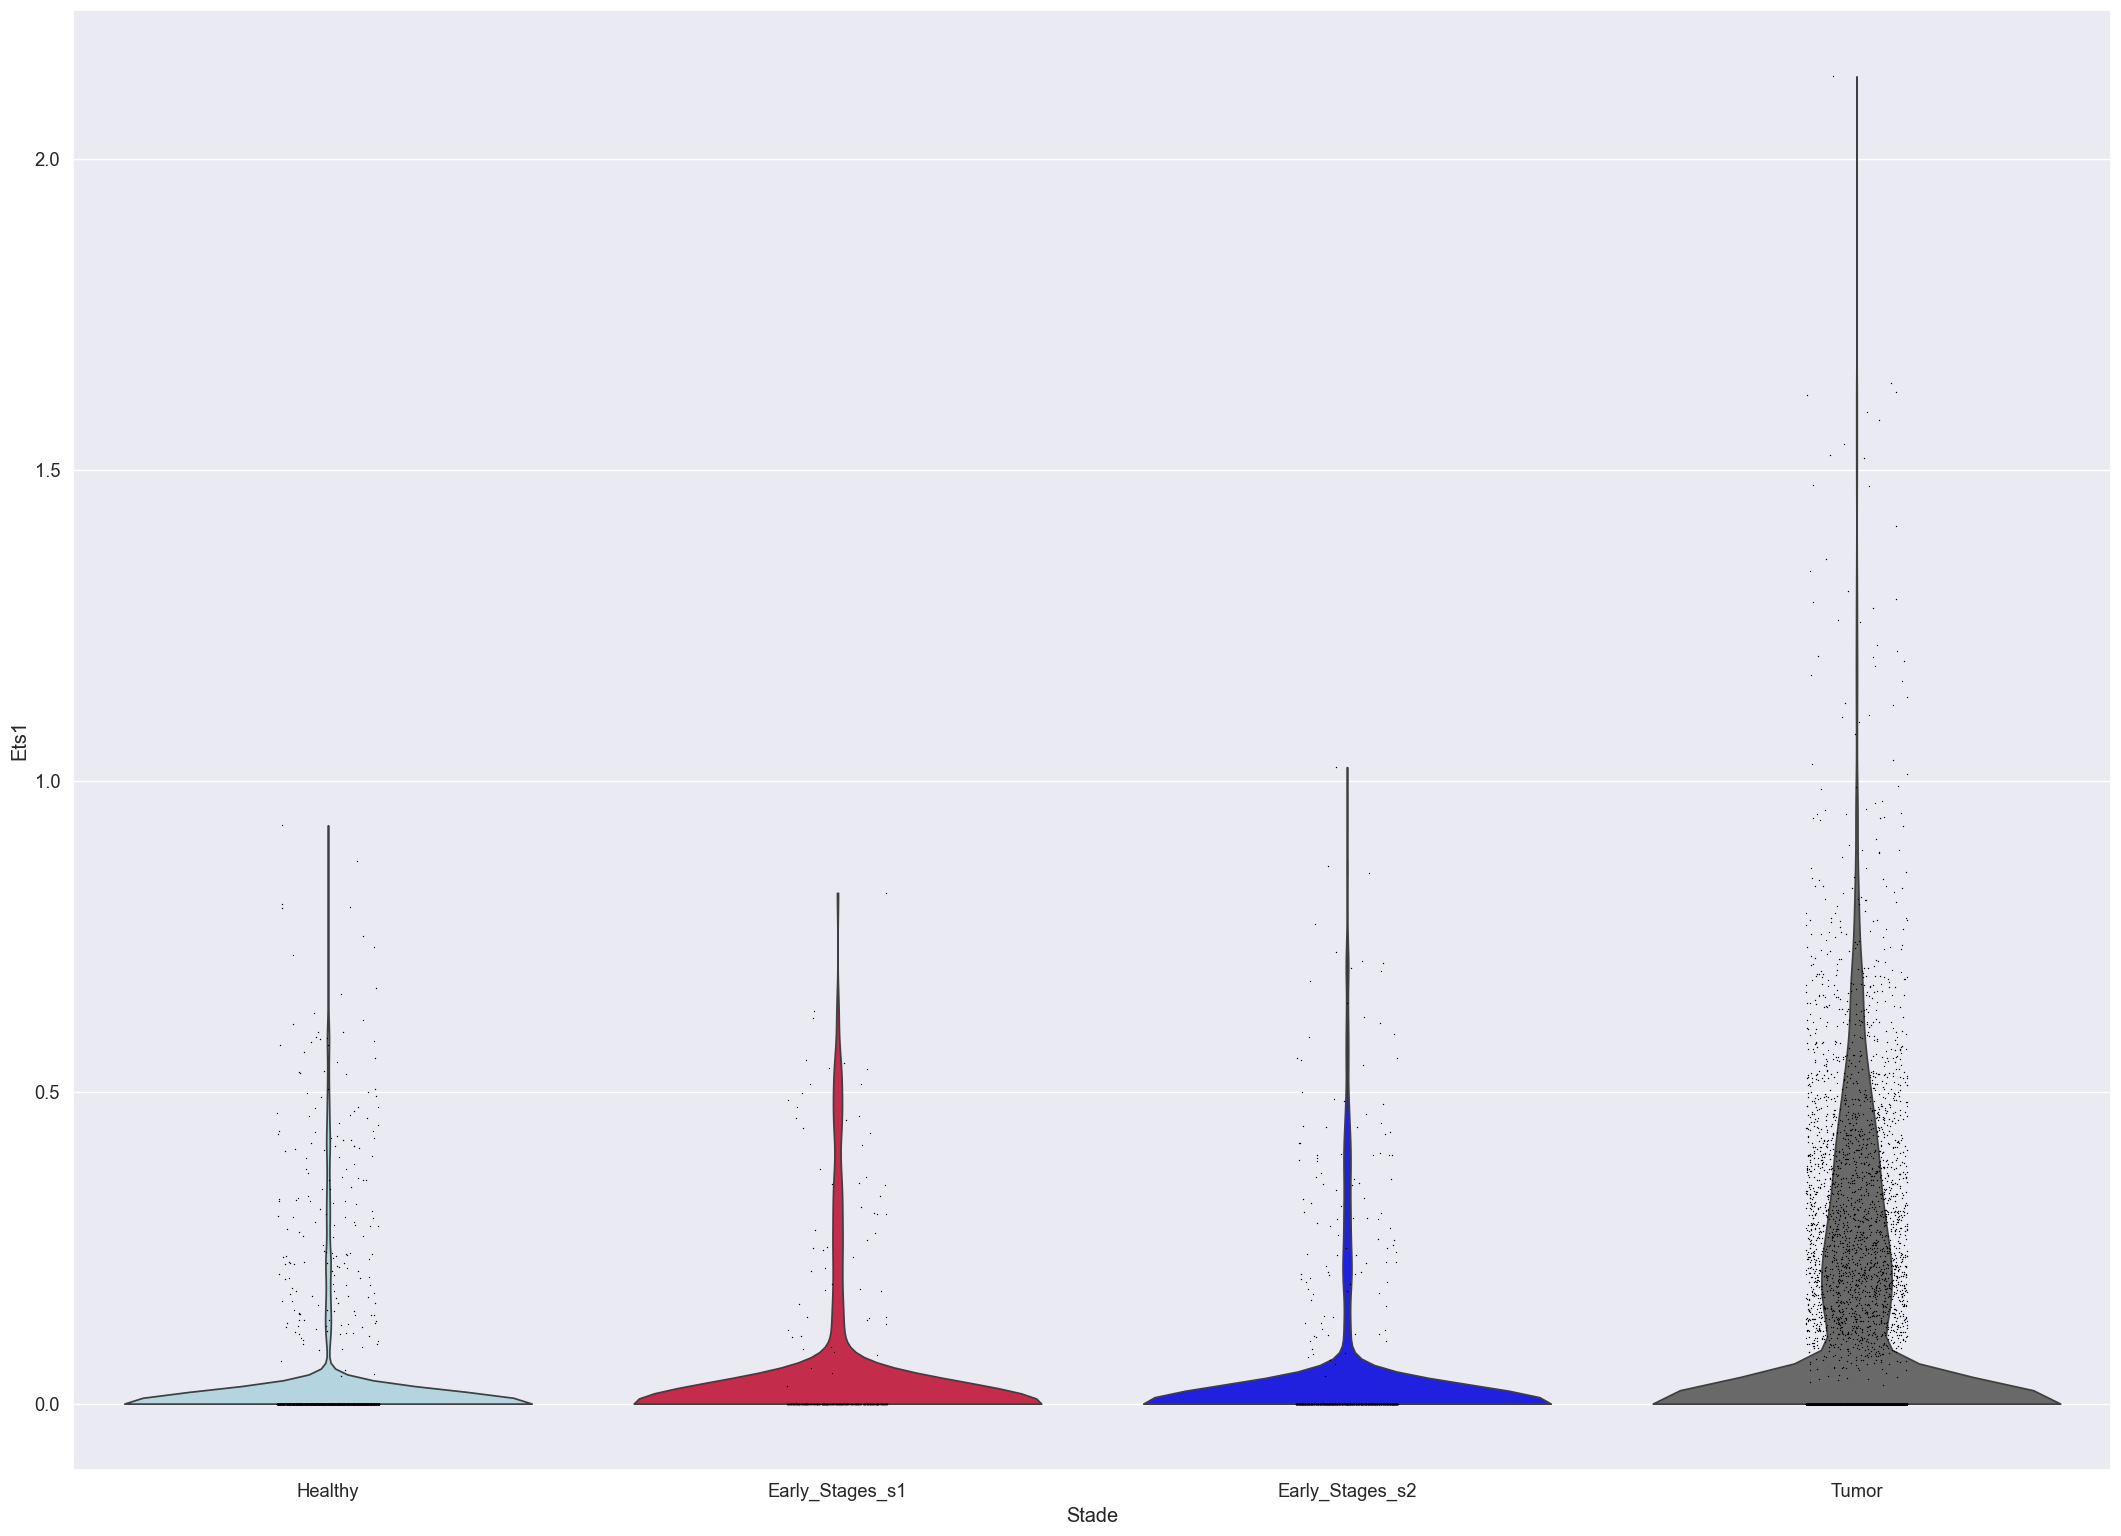

In [28]:
sc.pl.violin(adata_epi, keys = "Ets1", groupby="Stade")

In [29]:
a.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage',
       'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation',
       'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)', 'Stage_old',
       'new_orig', 'has_cnv', 'cnv_group', 'Stade'],
      dtype='object')